In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

# Constants 
E_max = 100  # Maximum effectiveness (e.g., 100%)
K_m = 50     # Dose at half-maximal effectiveness
n = 2        # Hill coefficient
T = 400     # Toxicity scaling factor
A = 6     # Amplitude of oscillations
P = 40       # Period of oscillations




def effectiveness(D):
    """Effectiveness as a function of dose, with toxicity and oscillations."""
    hill_term = (E_max * D**n) / (K_m**n + D**n)
    toxicity_term = D**2 / T
    oscillation_term = A * np.sin(2 * np.pi * D / P)
    return hill_term - toxicity_term + oscillation_term

In [2]:

def loss_function(D):
    """Loss function to minimize (negative effectiveness)."""
    return -effectiveness(D)


def loss_function_gradient(D):
    """Gradient of the loss function with repsect to dose."""
    hill_grad = (n * E_max * K_m**n * D**(n-1)) / (K_m**n + D**n)**2
    toxicity_grad = 2 * D / T
    oscillation_grad = (A * 2 * np.pi / P) * np.cos(2 * np.pi * D / P)
    return -(hill_grad - toxicity_grad + oscillation_grad)


'''
Let's define a range of drug concentrations based on which we will also define an effectiveness and a loss function.
'''

all_Ds = np.linspace(0,250,600)
all_Es = [effectiveness(D) for D in all_Ds]
all_Ls = [loss_function(D) for D in all_Ds]

In [3]:
'''
This cell generates plots to visualize the effectiveness and loss functions across a range of doses. 
These visualizations provide insight into the behavior of the functions and guide the optimization process.
The purpose of the cell is only to visualize results.
'''

def plot_results(all_Ds,all_Es,all_Ls,epochs,momentum_coefficients,d_history,optimal_Ds,D,title):

    if optimal_Ds is not None:
        plt.figure(figsize=(12,5),dpi=300)
        plt.plot(all_Ds,all_Ls,label="Loss Function (L(D))", color="red")
        plt.scatter(d_history[:epochs], [loss_function(D) for D in d_history[:epochs]], color="slategrey",s=160,alpha=0.6, label=f"Optimization Path for momentum coefficent {momentum_coefficients[0]}")
        plt.scatter(d_history[epochs:epochs*2], [loss_function(D) for D in d_history[epochs:epochs*2]],s=80,alpha=0.8, color="deepskyblue", label=f"Optimization Path for momentum coefficent {momentum_coefficients[1]}")
        plt.scatter(d_history[epochs*2:], [loss_function(D) for D in d_history[epochs*2:]], color="blue",s=20,alpha=1, label=f"Optimization Path for momentum coefficent {momentum_coefficients[2]}")


        plt.axvline(optimal_Ds[0], color="slategrey", linestyle="-", label=f"Optimal Dose found by momentum {momentum_coefficients[0]}: {optimal_Ds[0]:.2f}")
        plt.axvline(optimal_Ds[1], color="deepskyblue", linestyle=":", label=f"Optimal Dose found by momentum {momentum_coefficients[1]}: {optimal_Ds[1]:.2f}")
        plt.axvline(optimal_Ds[2], color="blue", linestyle=":", label=f"Optimal Dose found by momentum {momentum_coefficients[2]}: {optimal_Ds[2]:.2f}")


        plt.xlabel("Dose (D)")
        plt.ylabel("Loss")
        plt.title(f'Loss function vs Dose - {title}')
        plt.legend()
        plt.show()


        plt.figure(figsize=(12,5),dpi=300)
        plt.plot(all_Ds,all_Es,label="Drug Effectiveness function", color="cornflowerblue")
        
        plt.axvline(optimal_Ds[0], color="slategrey", linestyle="-", label=f"Optimal Dose found by momentum {momentum_coefficients[0]}: {optimal_Ds[0]:.2f}")
        plt.axvline(optimal_Ds[1], color="deepskyblue", linestyle=":", label=f"Optimal Dose found by momentum {momentum_coefficients[1]}: {optimal_Ds[1]:.2f}")
        plt.axvline(optimal_Ds[2], color="blue", linestyle=":", label=f"Optimal Dose found by momentum {momentum_coefficients[2]}: {optimal_Ds[2]:.2f}")

        plt.xlabel("Dose (D)")
        plt.ylabel("Drug Effectiveness")
        plt.title(f'Drug Effectiveness vs Dose - {title}')
        plt.legend()
        plt.show()


    else:
        plt.figure(figsize=(12,5),dpi=300)
        plt.plot(all_Ds,all_Ls,label="Loss Function (L(D))", color="red")
        plt.scatter(d_history, [loss_function(D) for D in d_history], color="blue", label="Optimization Path")
        plt.axvline(D, color="blue", linestyle="--", label=f"Optimal Dose found: {D:.2f}")
        plt.xlabel("Dose (D)")
        plt.ylabel("Loss")
        plt.title(f'Loss function vs Dose - {title}')
        plt.legend()
        plt.show()

        plt.figure(figsize=(12,5),dpi=300)
        plt.plot(all_Ds,all_Es,label="Drug Effectiveness function", color="cornflowerblue")
        
        plt.axvline(D, color="blue", linestyle="-", label=f"Optimal Dose found: {D:.2f}")


        plt.xlabel("Dose (D)")
        plt.ylabel("Drug Effectiveness")
        plt.title(f'Drug Effectiveness vs Dose - {title}')
        plt.legend()
        plt.show()

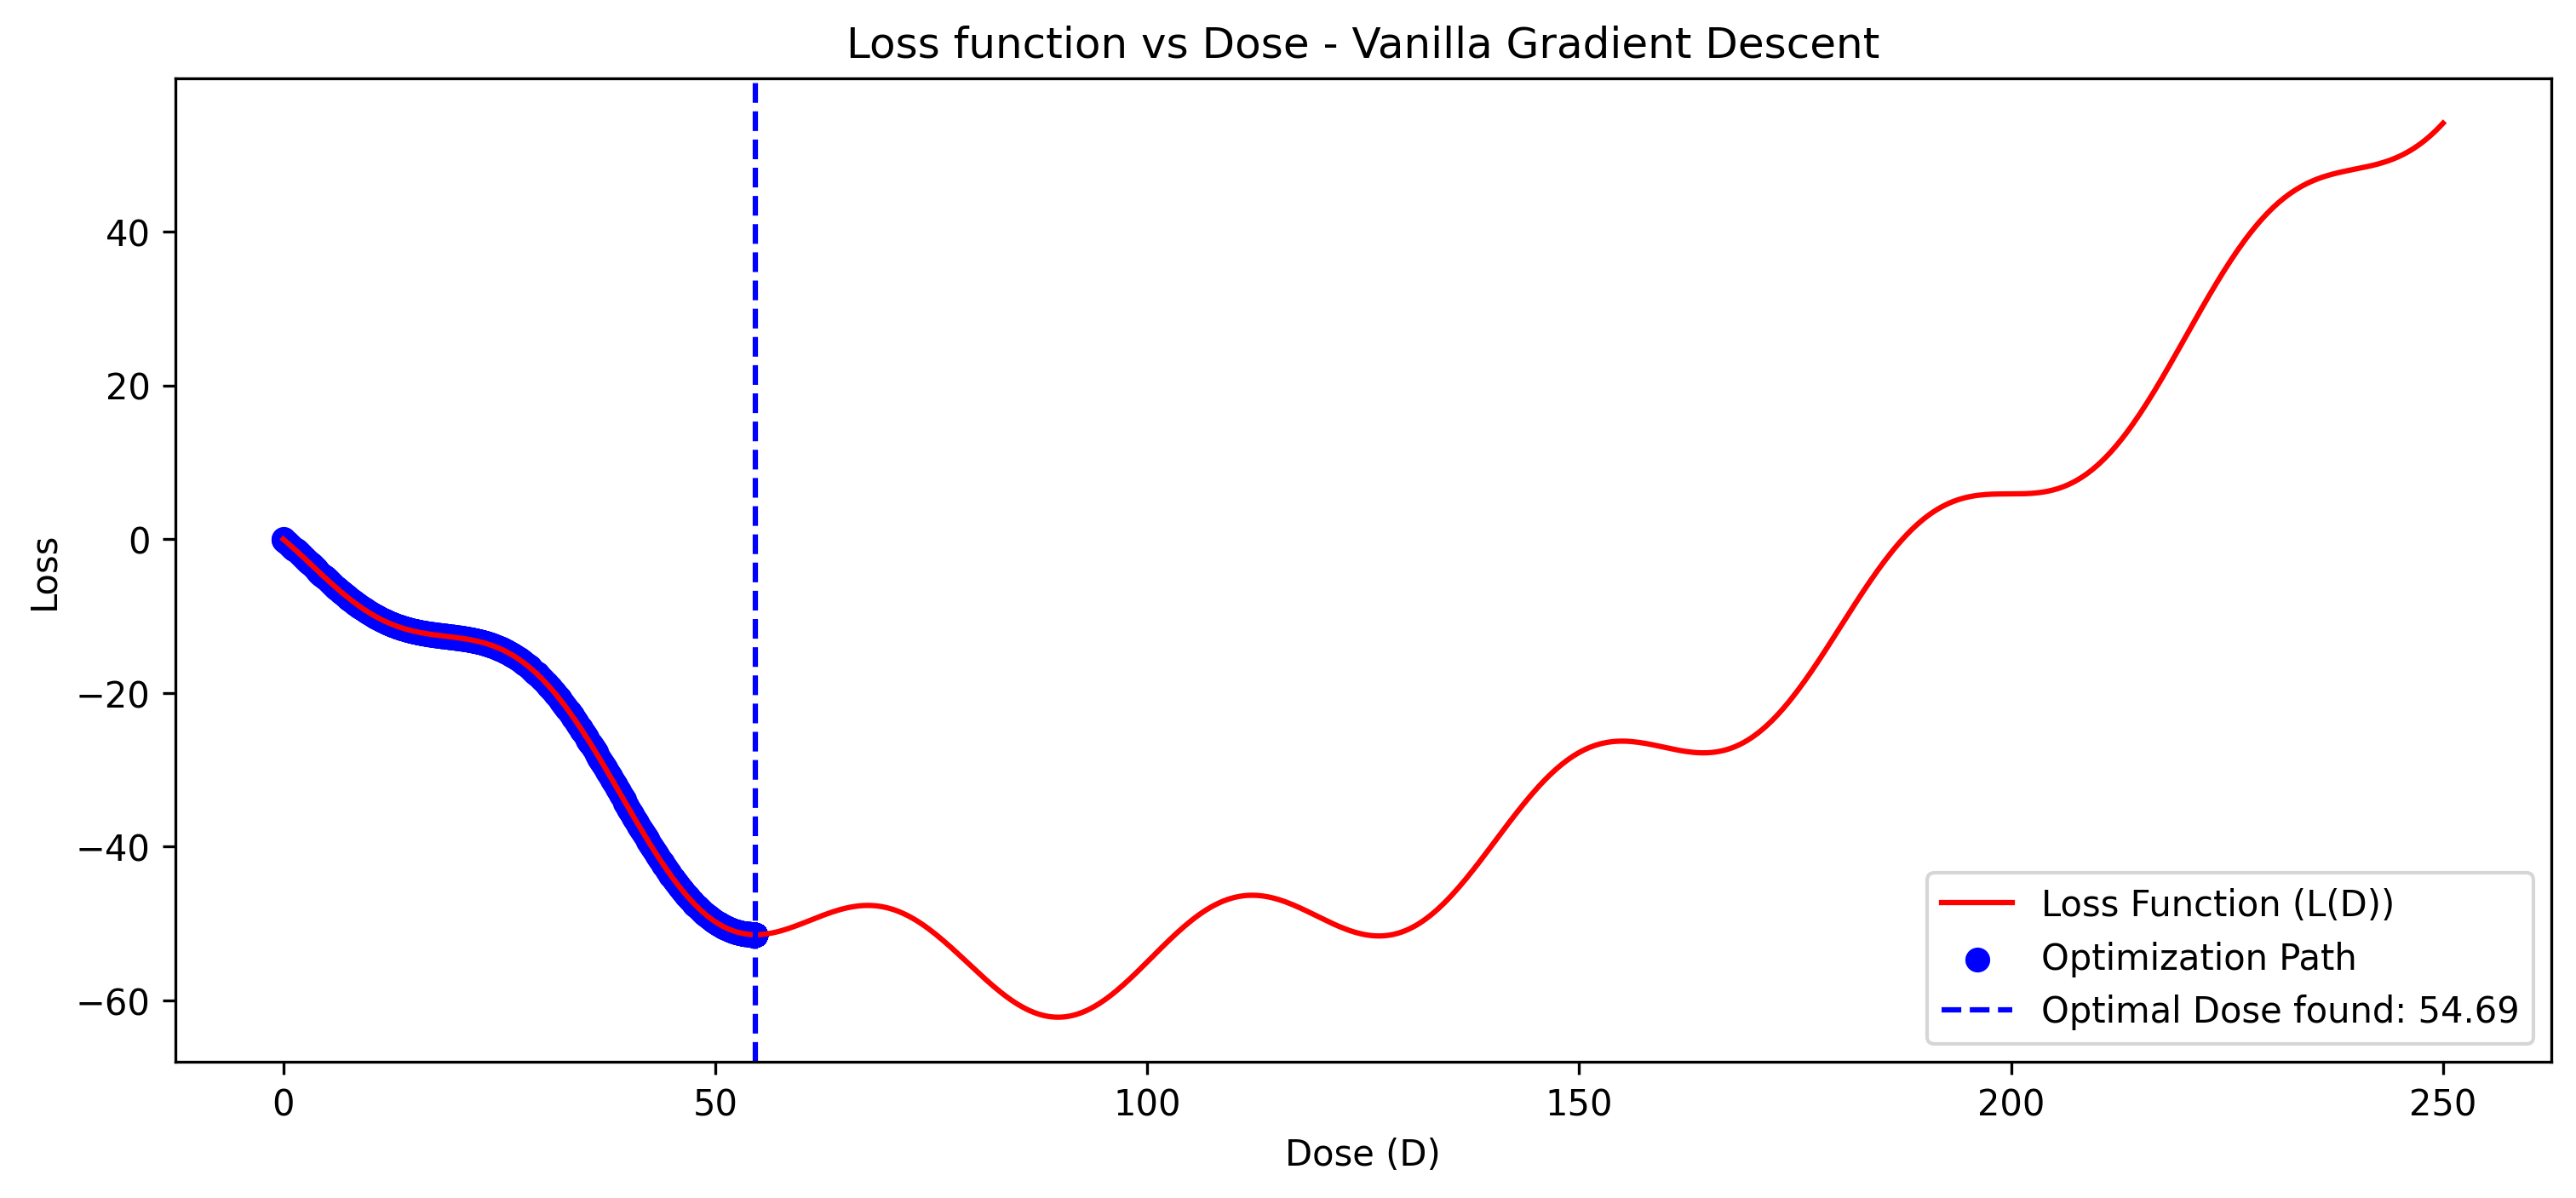

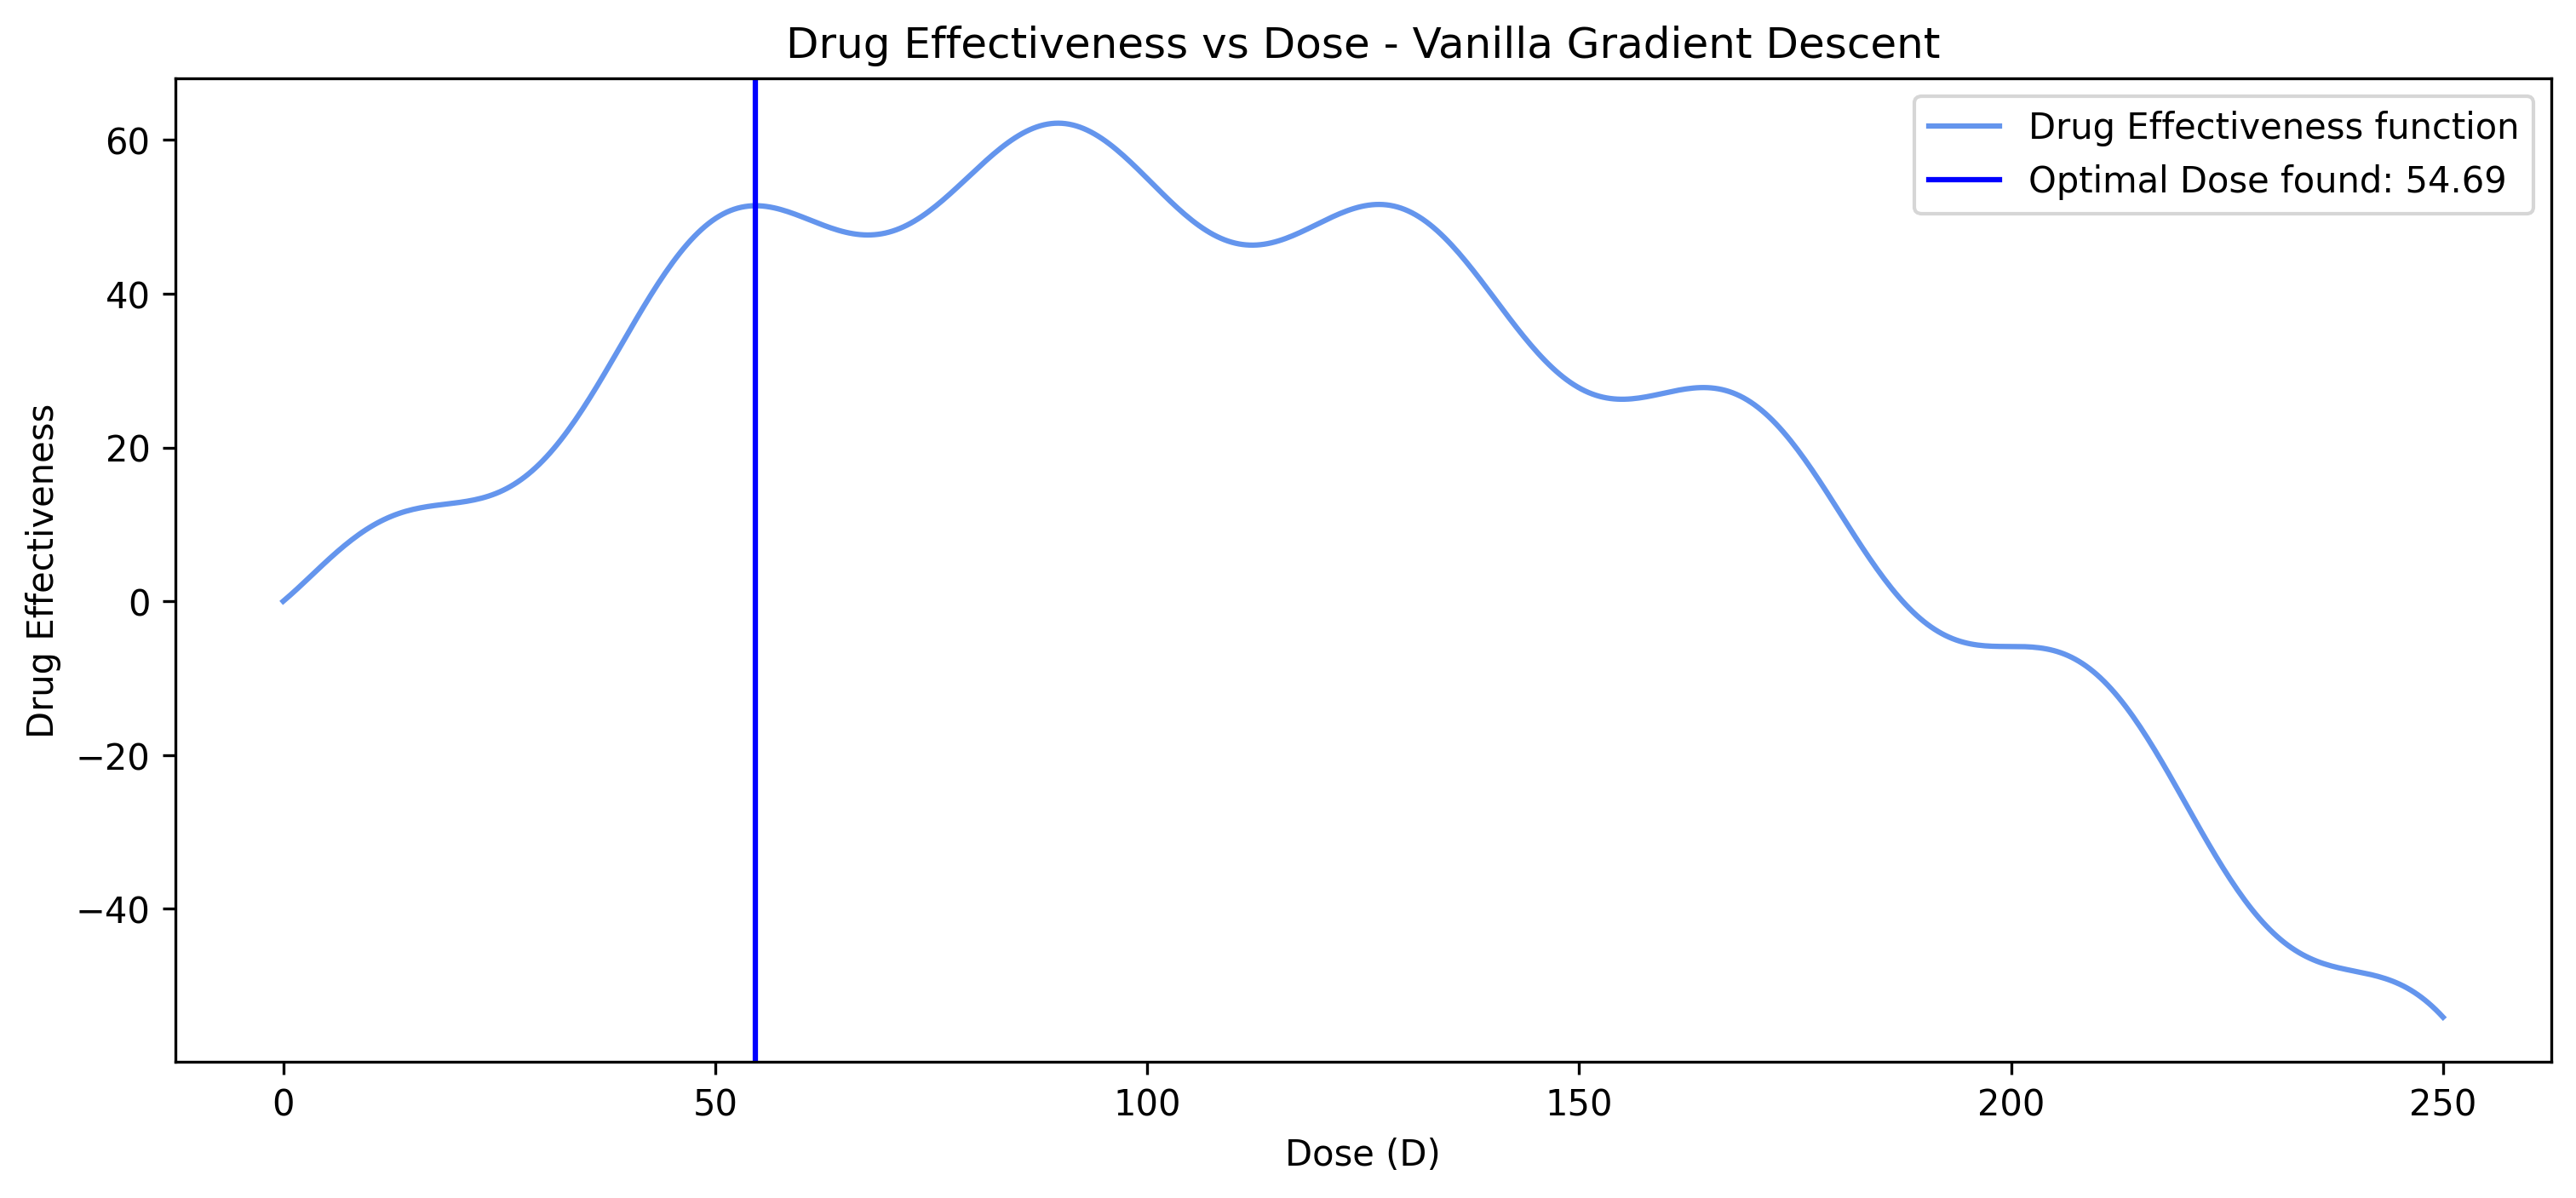

Maximum Effectiveness: 51.437554259234815


In [4]:
'''
To start with, we will use the simple version (Vanilla) of Gradient Descent, starting with a dose of 0, (D = 0), 
and a learning rate of 0.01 (common for all the versions of Gradient Descent that we will use)
and observe how the algorithm will optimize the value.
'''
D = 0
learning_rate = 0.1
epochs = 10000

losses_gd = []
d_history_gd = []

for _ in range(epochs):

    d_history_gd.append(D)
    losses_gd.append(loss_function(D))

    D -= learning_rate * loss_function_gradient(D)

plot_results(all_Ds,all_Es,all_Ls,epochs,None,d_history_gd,None,D,'Vanilla Gradient Descent')
print(f'Maximum Effectiveness: {effectiveness(D)}')


In [5]:
'''
Observations: 

The dose (D) is consistently updated in the correct direction, minimizing the loss function effectively. 
However, the process eventually gets stuck in a local minimum, 
likely because the gradient approaches zero as the slope of the loss function flattens.

Optimal Dose suggested by Vanilla Gradient Descent : 53.09
Maximum effectiveness by Vanilla Gradient Descent : 51.25
'''

'\nObservations: \n\nThe dose (D) is consistently updated in the correct direction, minimizing the loss function effectively. \nHowever, the process eventually gets stuck in a local minimum, \nlikely because the gradient approaches zero as the slope of the loss function flattens.\n\nOptimal Dose suggested by Vanilla Gradient Descent : 53.09\nMaximum effectiveness by Vanilla Gradient Descent : 51.25\n'

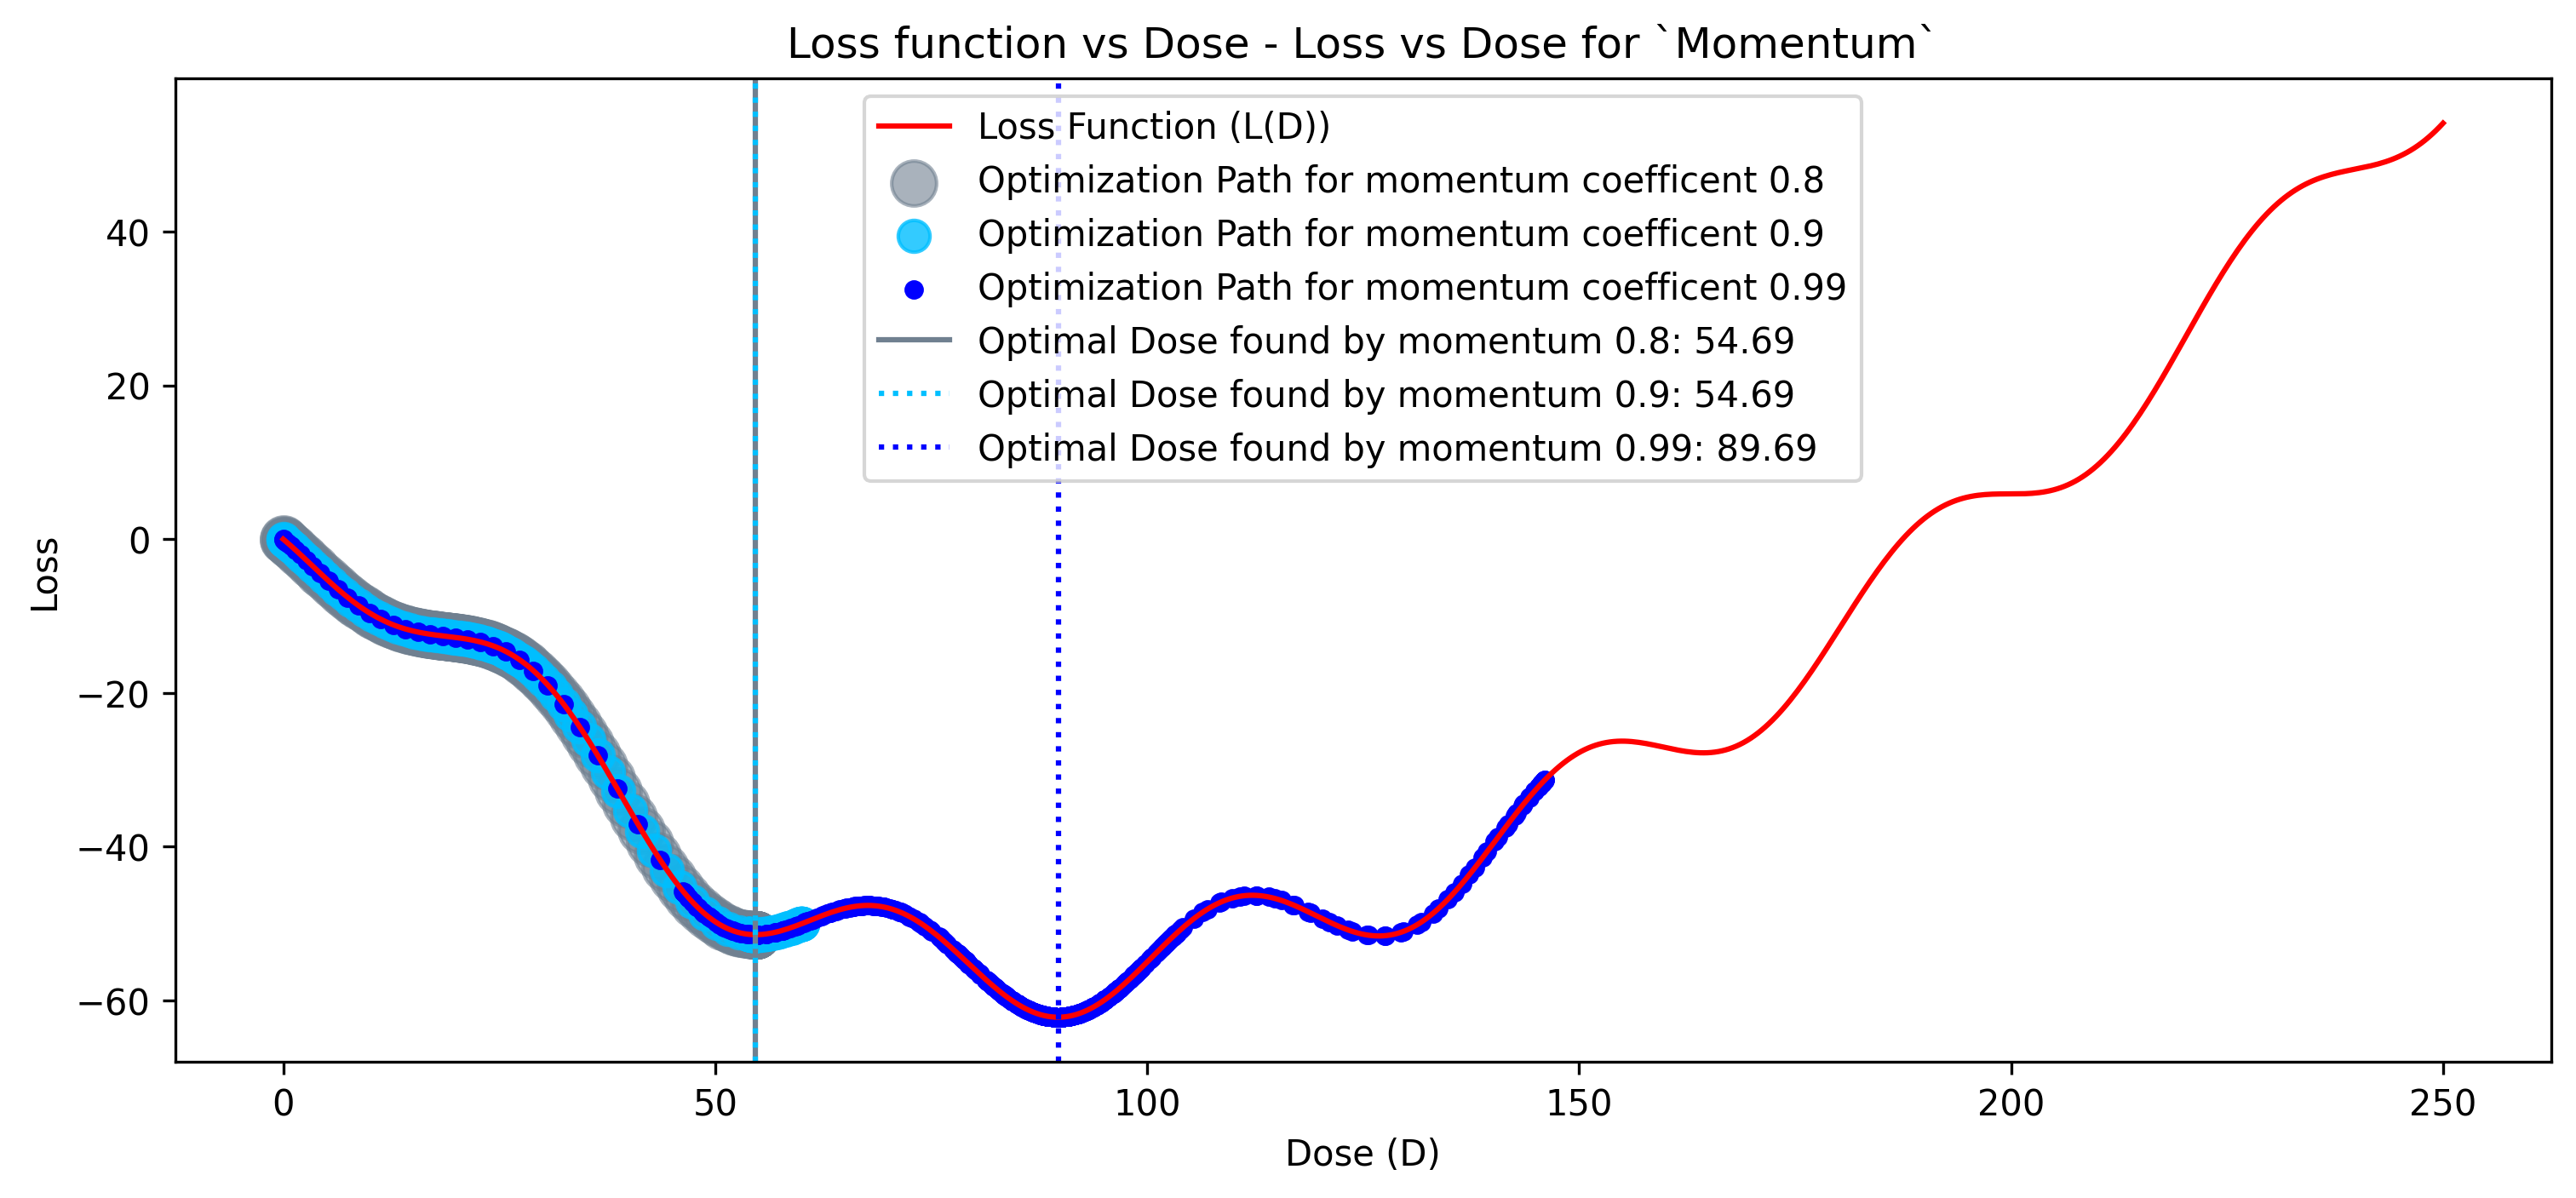

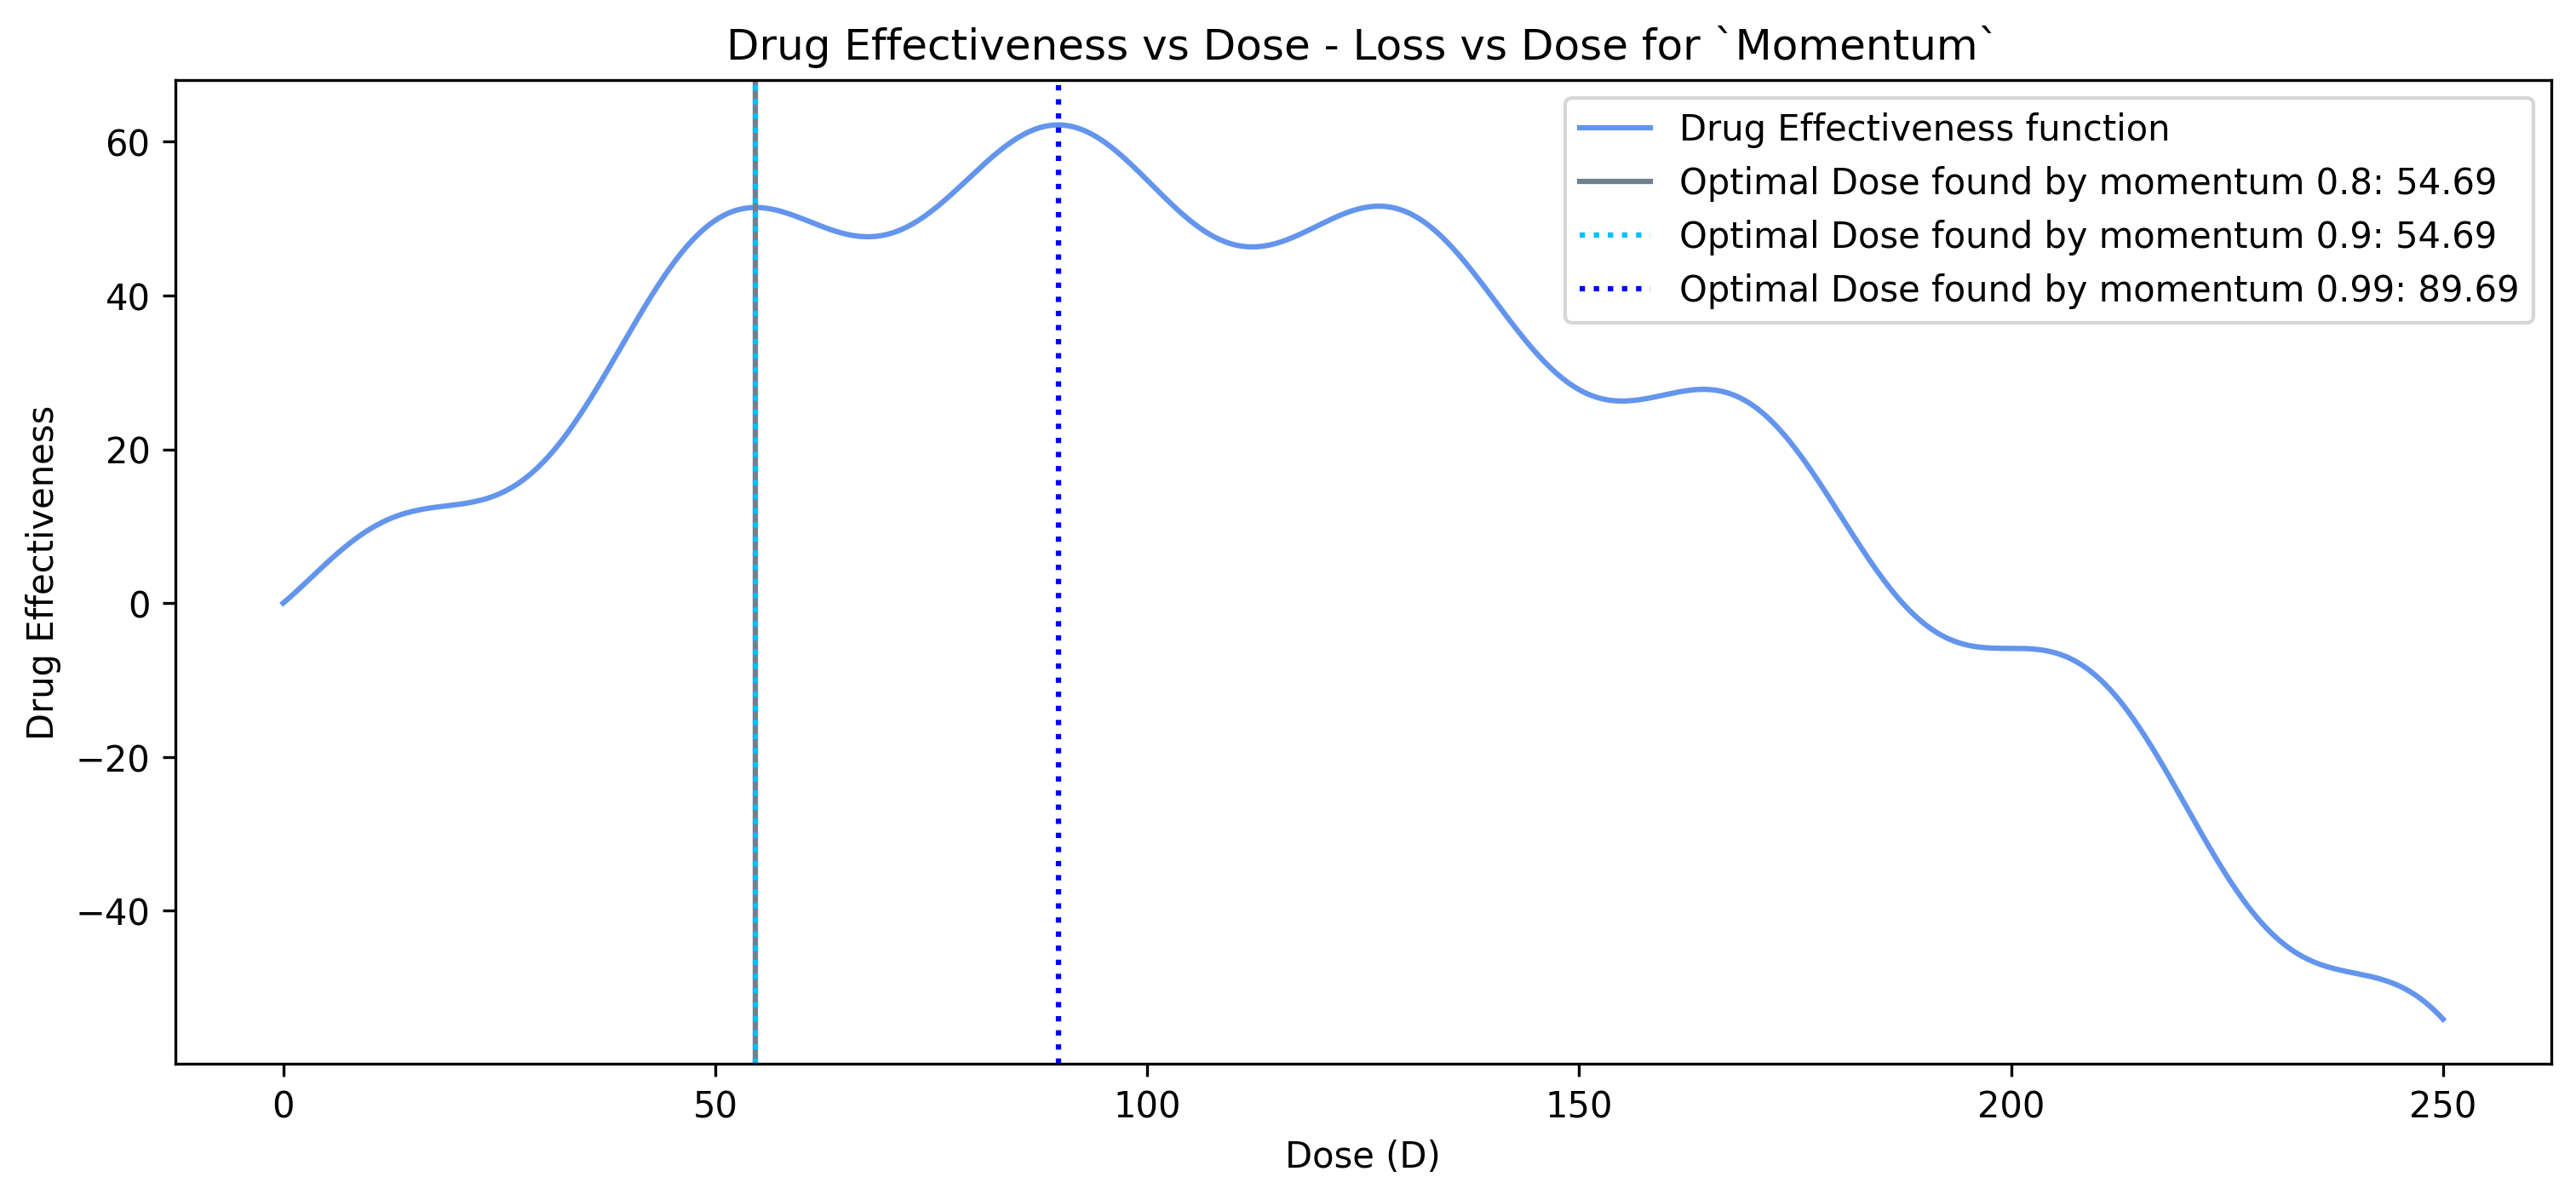

Maximum Effectiveness with Momentum : 62.17
Best Dose for maximum Effectiveness with Momentum : 89.69


In [6]:
'''
We will continue by adding Momentum to our Gradient Descent, 
Builds up speed by adding some of the previous step’s direction to the current one,
helping to move faster and avoid getting stuck in small dips or local minimas.
Again, all the variables on which ur equation depends, including the D = 0 to initilize,
and the learning rate, stay the same.
'''

learning_rate = 0.1
epochs = 100000

'''
The momentum coefficient determines how much of the previous update's direction is carried forward,
 to accelerate convergence and avoid local minima.
'''
momentum_coefficients = [0.8, 0.9, 0.99] #We will try out 3 different Momentum coefficients

losses_with_momentum = []
d_history_momentum = []
optimal_Ds_momentum = []

for momentum_coefficient in momentum_coefficients:
    D = 0
    v = 0

    for _ in range(epochs):
        d_history_momentum.append(D)
        losses_with_momentum.append(loss_function(D))

        v = momentum_coefficient * v + learning_rate * loss_function_gradient(D)
        D -= v

    optimal_Ds_momentum.append(D)

plot_results(all_Ds,all_Es,all_Ls,epochs,momentum_coefficients,d_history_momentum,optimal_Ds_momentum,D,'Loss vs Dose for `Momentum`')

best_effectiveness_momentum = 0 
best_d = None

for d in optimal_Ds_momentum:
    if effectiveness(d) > best_effectiveness_momentum:
        best_effectiveness_momentum = effectiveness(d)
        best_d = d

print(f'Maximum Effectiveness with Momentum : {best_effectiveness_momentum:.2f}')
print(f'Best Dose for maximum Effectiveness with Momentum : {best_d:.2f}')




In [7]:
'''
Observations: 

The dose (D) is consistently updated in the correct direction, minimizing the loss function effectively. 

For the Momentum coefficients 0.8 and 0.9, the gradient is again stuck in the same local minimum as before.

For a momentum coeffient of 0.99 is accumulates more "speed" or better, velocity, moving past the local minimum,
and eventually finding the global minimum.

Interestingly, if we examine the optimization path, we see that the dose value overshoots and reaches approximately
D=150 before coming back to converge at around D = 90, the global minimum. 
This overshooting occurs because the momentum carries the updates further along the loss function landscape.

Important notice.

If the loss function didn’t rise again near D = 150,
there is a strong chance that the momentum would have extended the optimization past the global minimum entirely, missing it. 


Best Dose suggested by Gradient Descent with Momentum : 89.69
Maximum Effectiveness found by Gradient Descent with Momentum : 62.17
'''

'\nObservations: \n\nThe dose (D) is consistently updated in the correct direction, minimizing the loss function effectively. \n\nFor the Momentum coefficients 0.8 and 0.9, the gradient is again stuck in the same local minimum as before.\n\nFor a momentum coeffient of 0.99 is accumulates more "speed" or better, velocity, moving past the local minimum,\nand eventually finding the global minimum.\n\nInterestingly, if we examine the optimization path, we see that the dose value overshoots and reaches approximately\nD=150 before coming back to converge at around D = 90, the global minimum. \nThis overshooting occurs because the momentum carries the updates further along the loss function landscape.\n\nImportant notice.\n\nIf the loss function didn’t rise again near D = 150,\nthere is a strong chance that the momentum would have extended the optimization past the global minimum entirely, missing it. \n\n\nBest Dose suggested by Gradient Descent with Momentum : 89.69\nMaximum Effectiveness f

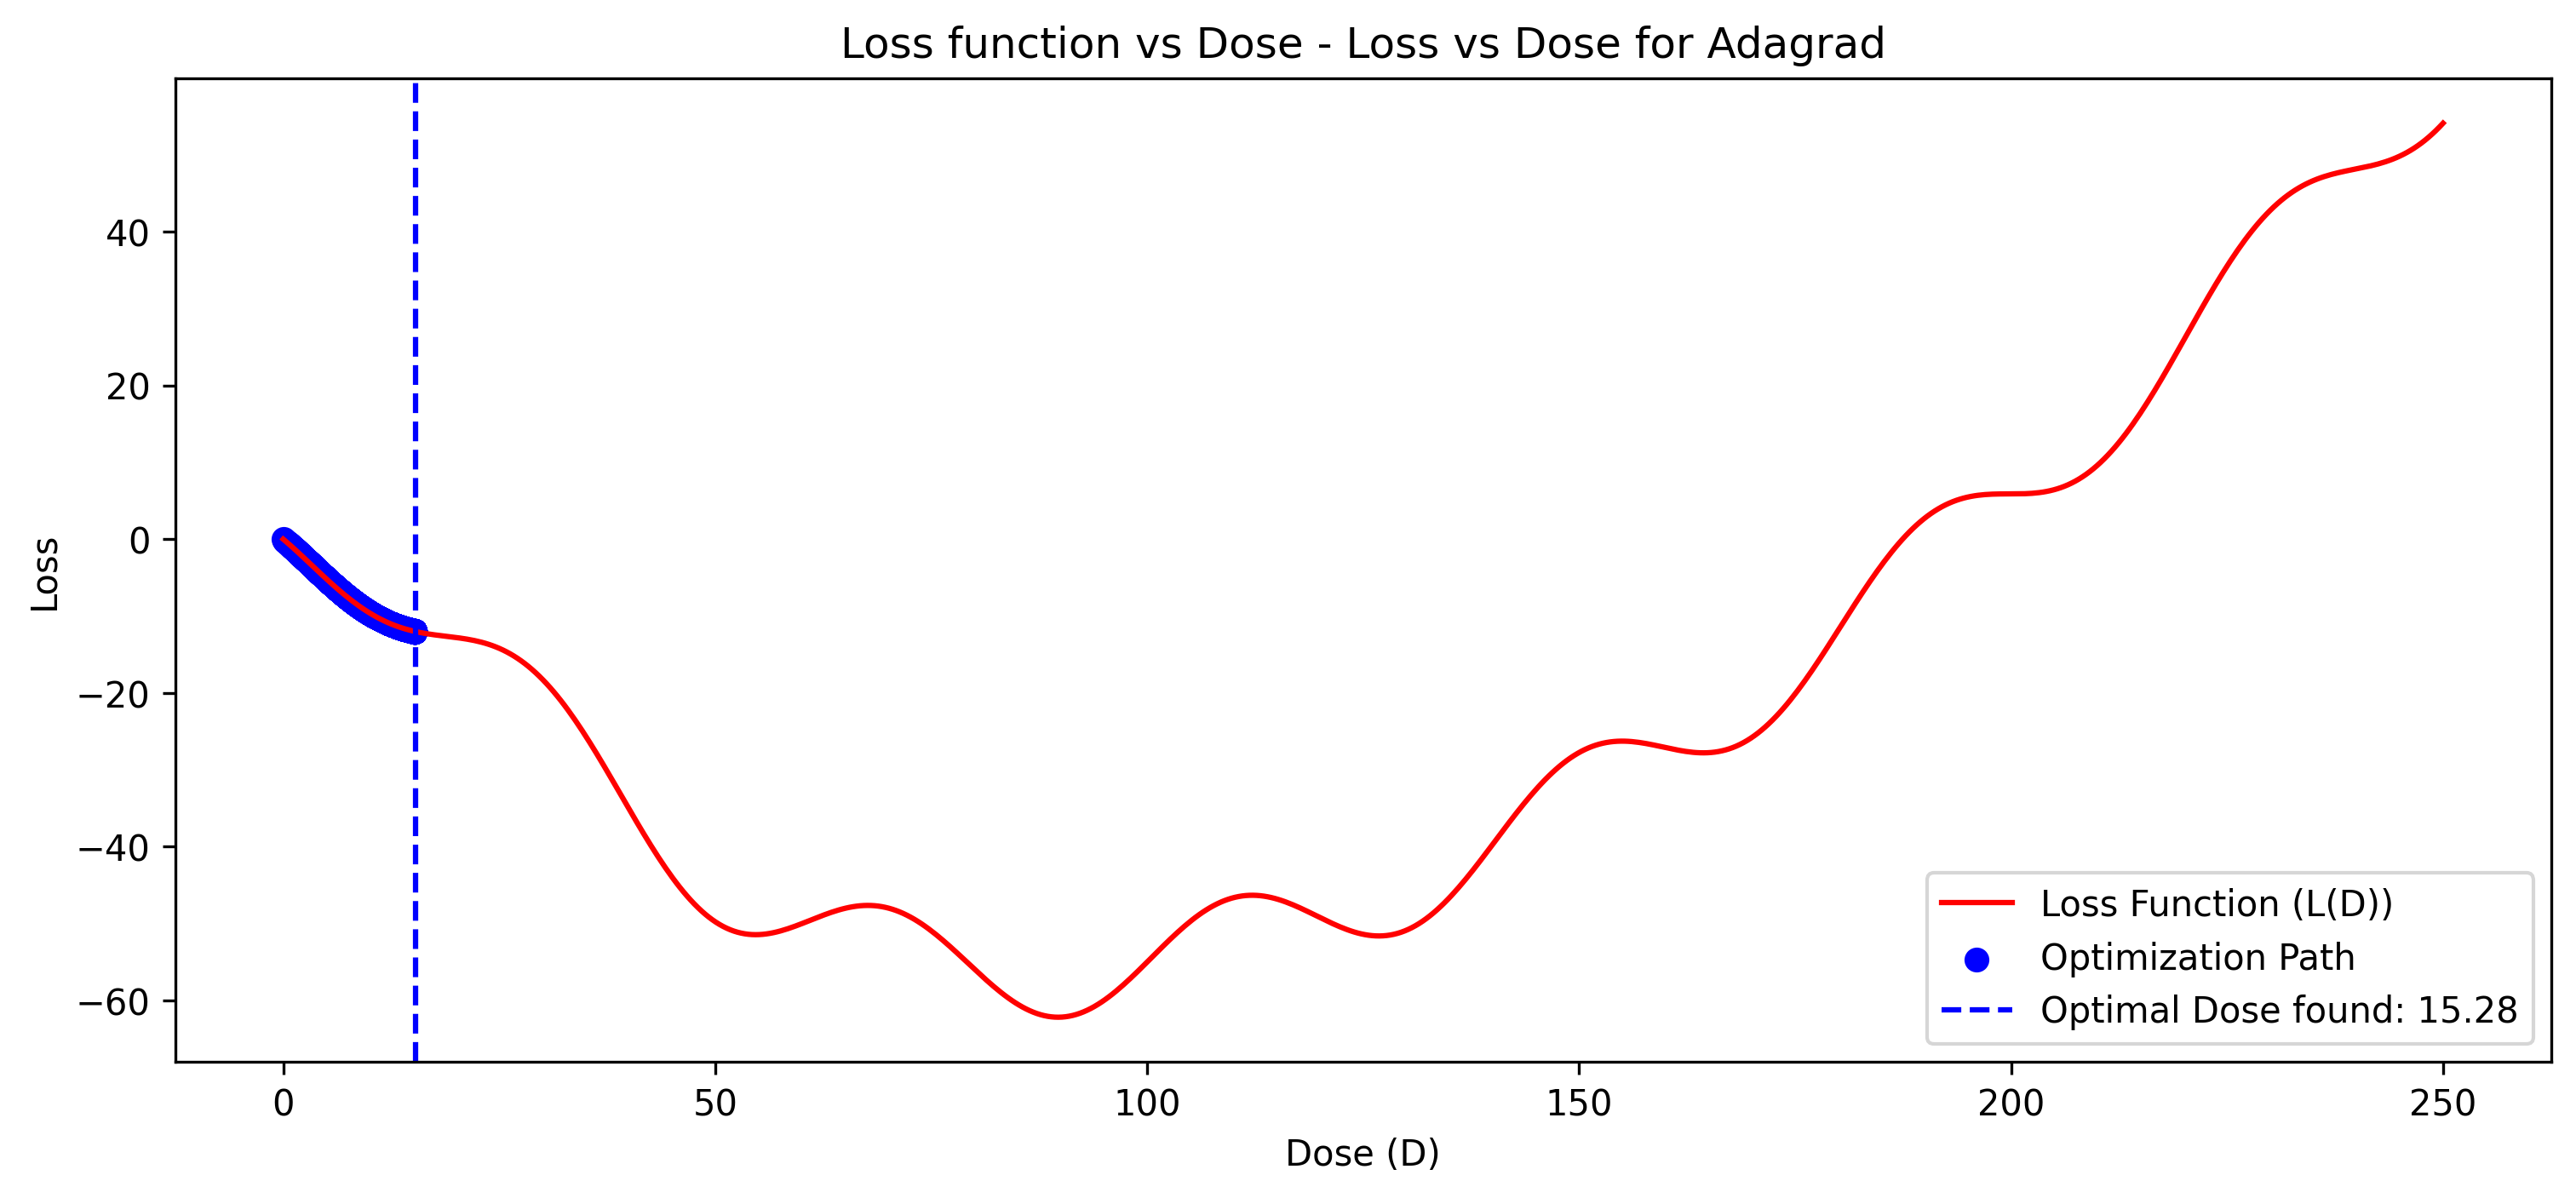

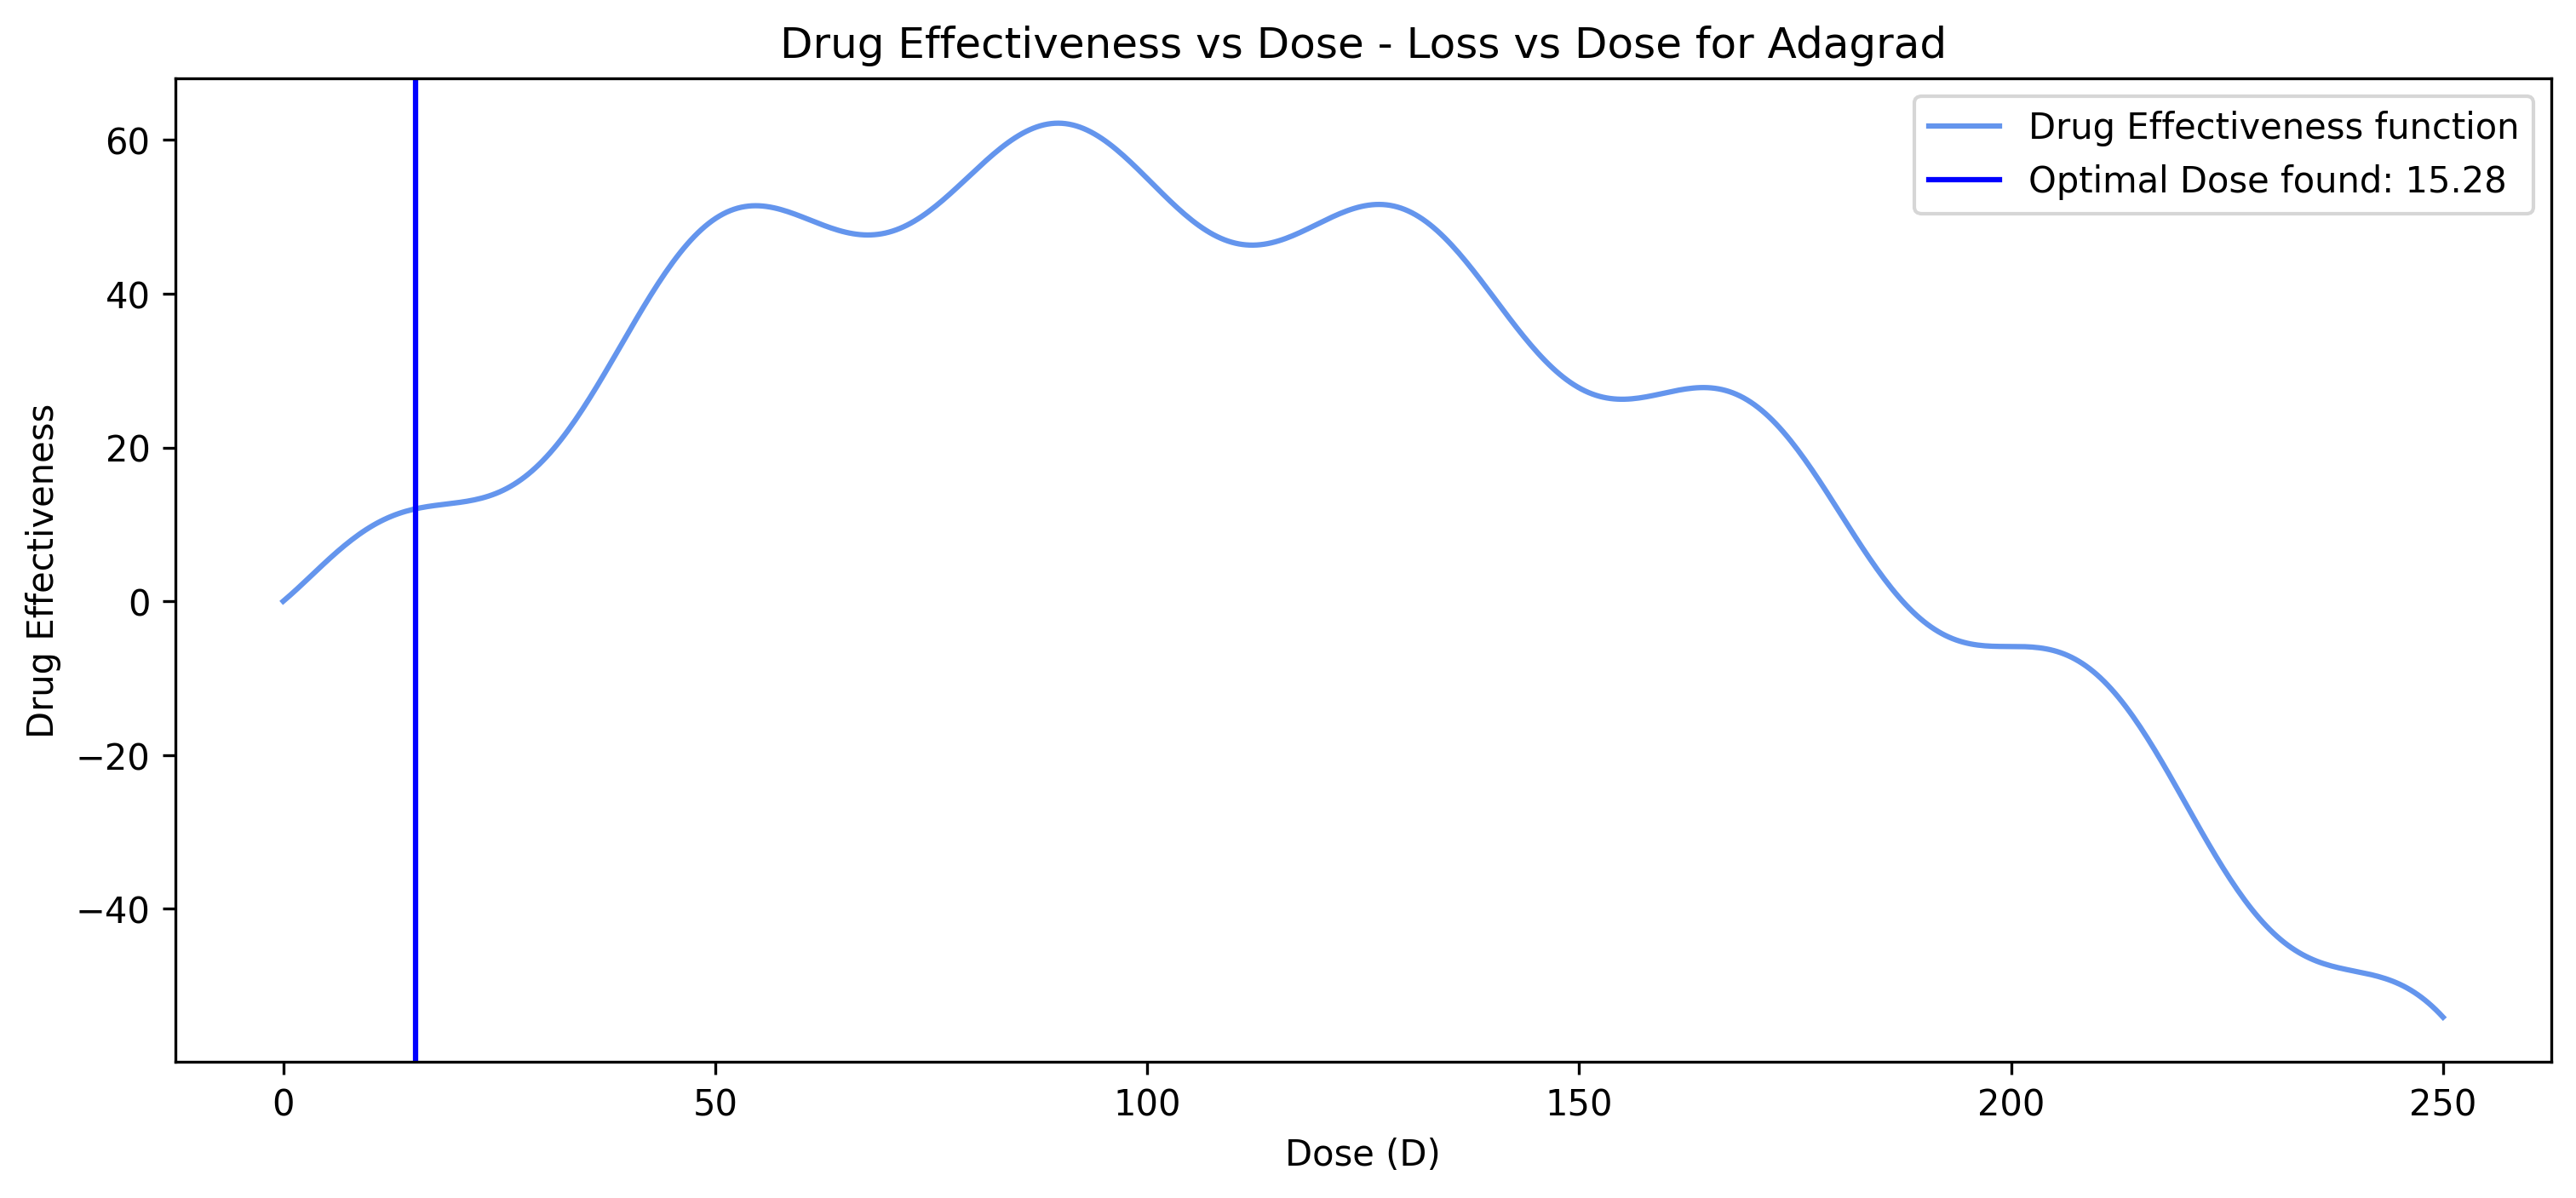

Maximum Effectiveness with Adagrad : 12.01
Best Dose for maximum Effectiveness with Adagrad : 15.28


In [8]:
'''
In this cell, we implement Gradient Descent with Adagrad to optimize the dose (D). 

Adagrad adjusts the learning rate dynamically for each step by considering the accumulation of squared gradients over time.
This allows the algorithm to take smaller steps for parameters with larger gradients,
and larger steps for those with smaller gradients.

The accumulated gradient term ensures that the learning rate decreases adaptively during the optimization process.
'''

D = 0
epsilon = 1e-8 # small constant to avoid dividing by zero
learning_rate = 0.1
epochs = 10000

g_accumulated = 0

losses_with_adagrad = []
d_history_adagrad = []

for _ in range(epochs):
    d_history_adagrad.append(D)
    losses_with_adagrad.append(loss_function(D))

    g_accumulated += loss_function_gradient(D)**2
    effective_learning_rate = learning_rate / (np.sqrt(g_accumulated) + epsilon)

    D -= effective_learning_rate * loss_function_gradient(D)


plot_results(all_Ds,all_Es,all_Ls,epochs,None,d_history_adagrad,None,D,'Loss vs Dose for Adagrad')


print(f'Maximum Effectiveness with Adagrad : {effectiveness(D):.2f}')
print(f'Best Dose for maximum Effectiveness with Adagrad : {D:.2f}')

In [9]:
'''
Observations: 

Adagrad's learning rate can become excessively small over time due to the accumulation of gradients. 

This makes our optimization path not able to even find the first local minimum. 

Adagrad does not work effectiveley for this case.

Best Dose suggested by Gradient Descent with Adagrad : 15.28
Maximum Effectiveness found by Gradient Descent with Adagrad : 12.01
'''

"\nObservations: \n\nAdagrad's learning rate can become excessively small over time due to the accumulation of gradients. \n\nThis makes our optimization path not able to even find the first local minimum. \n\nAdagrad does not work effectiveley for this case.\n\nBest Dose suggested by Gradient Descent with Adagrad : 15.28\nMaximum Effectiveness found by Gradient Descent with Adagrad : 12.01\n"

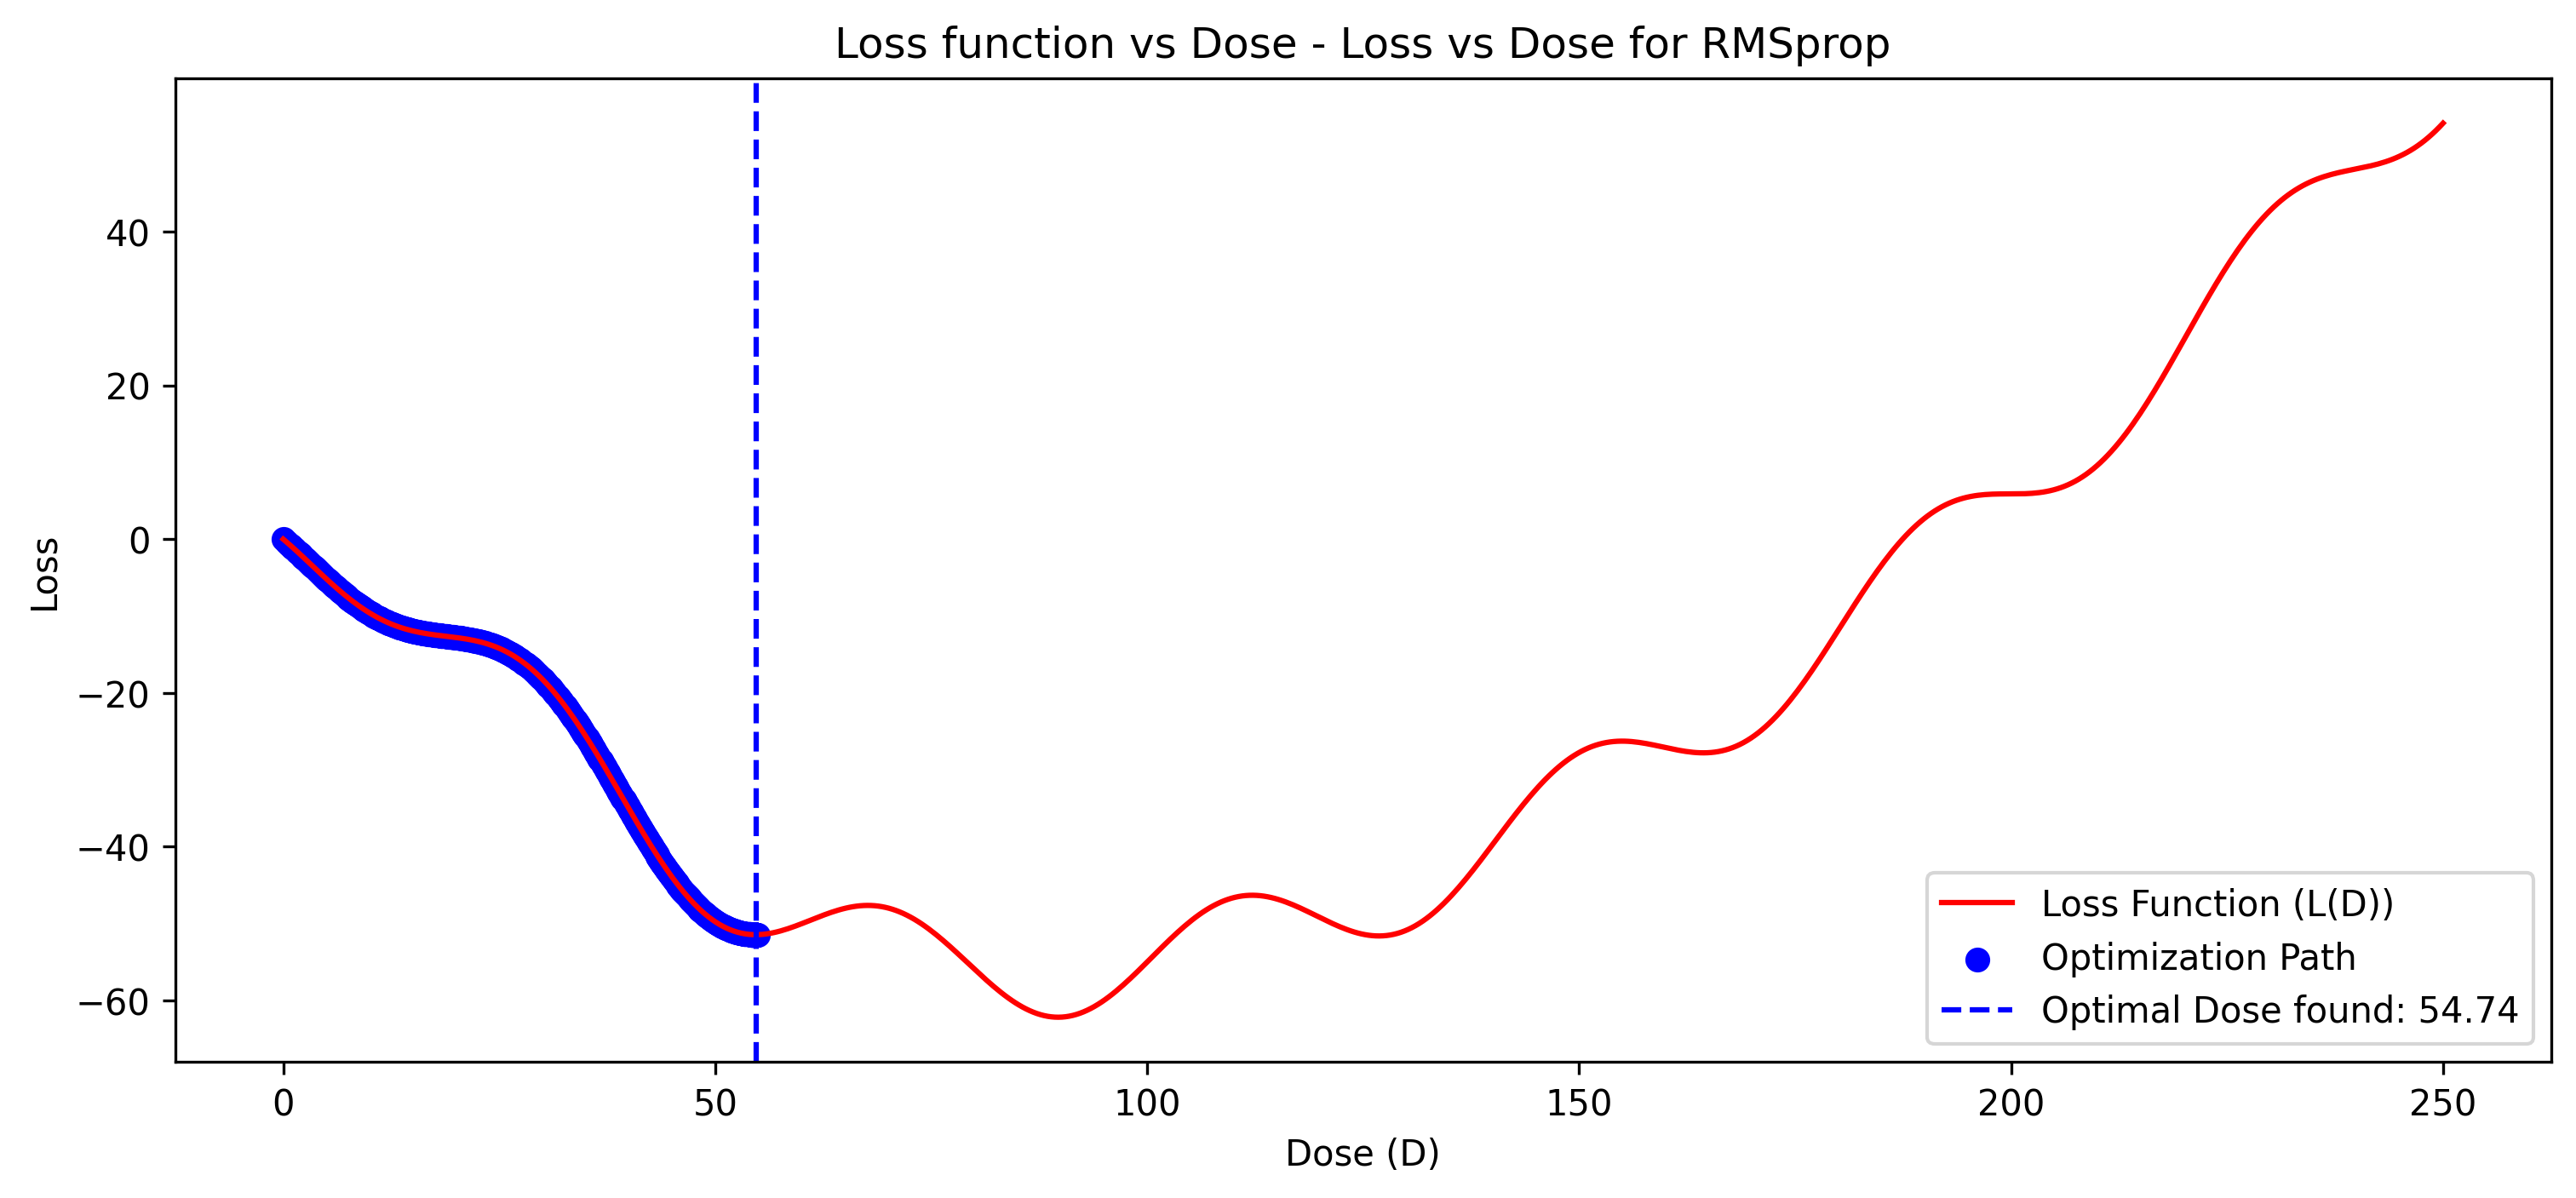

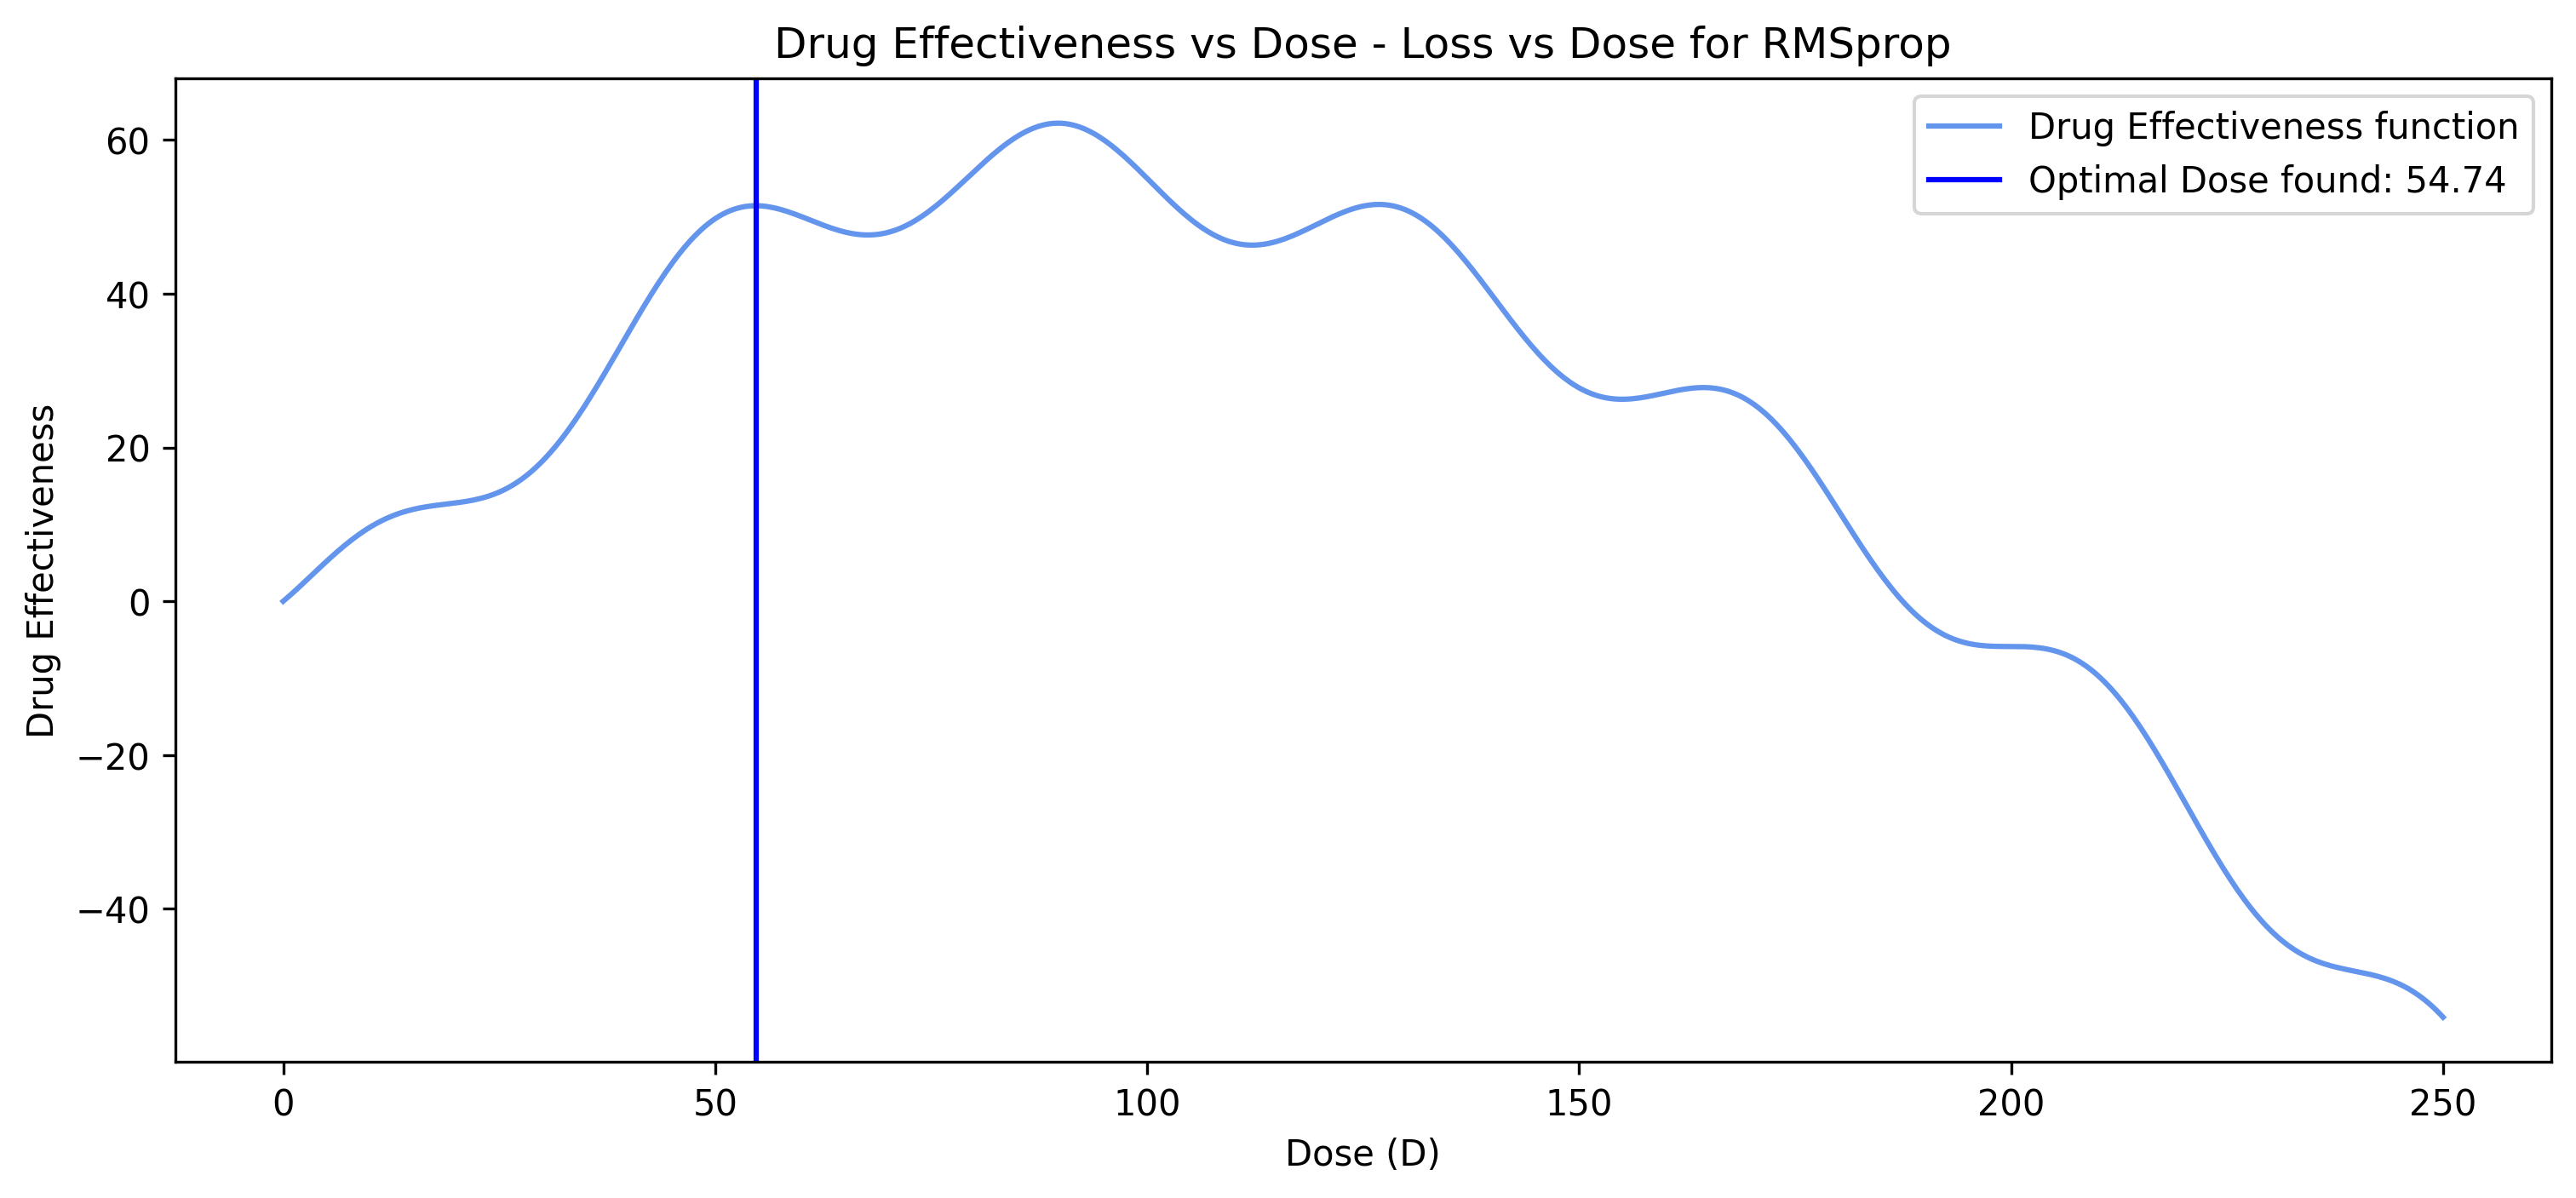

Maximum Effectiveness with RMSprop : 51.44
Best Dose for maximum Effectiveness with RMSprop : 54.74


In [10]:
''' 
In this cell, we implement Gradient Descent with RMSprop to optimize the dose (D).

RMSprop is similar to Adagrad in that it adjusts the learning rate dynamically for each step.
However, unlike Adagrad, which accumulates all past gradients, RMSprop uses a moving average of squared gradients. 
This prevents the learning rate from becoming excessively small over time, addressing one of Adagrad's limitations.
'''

D = 0
epsilon = 1e-8 # small constant to avoid dividing by zero
learning_rate = 0.1
epochs = 10000
rms_prop_coefficient = 0.90

sqgr = 0

losses_with_RMS_prop = []
d_history_RMS_prop = []

for _ in range(epochs):
    d_history_RMS_prop.append(D)
    losses_with_RMS_prop.append(loss_function(D))

    sqgr = rms_prop_coefficient * sqgr + (1 - rms_prop_coefficient) * loss_function_gradient(D)**2
    effective_learning_rate = learning_rate / (np.sqrt(sqgr) + epsilon)

    D -= effective_learning_rate * loss_function_gradient(D)

plot_results(all_Ds,all_Es,all_Ls,epochs,None,d_history_RMS_prop,None,D,'Loss vs Dose for RMSprop')

print(f'Maximum Effectiveness with RMSprop : {effectiveness(D):.2f}')
print(f'Best Dose for maximum Effectiveness with RMSprop : {D:.2f}')


In [11]:
''' 
Observations: 

The results are much better that the ones we got form Adagrad but, still not optimal.

Best Dose suggested by Gradient Descent with RMSprop : 54.70
Maximum Effectiveness found by Gradient Descent with RMSprop : 51.04
'''

' \nObservations: \n\nThe results are much better that the ones we got form Adagrad but, still not optimal.\n\nBest Dose suggested by Gradient Descent with RMSprop : 54.70\nMaximum Effectiveness found by Gradient Descent with RMSprop : 51.04\n'

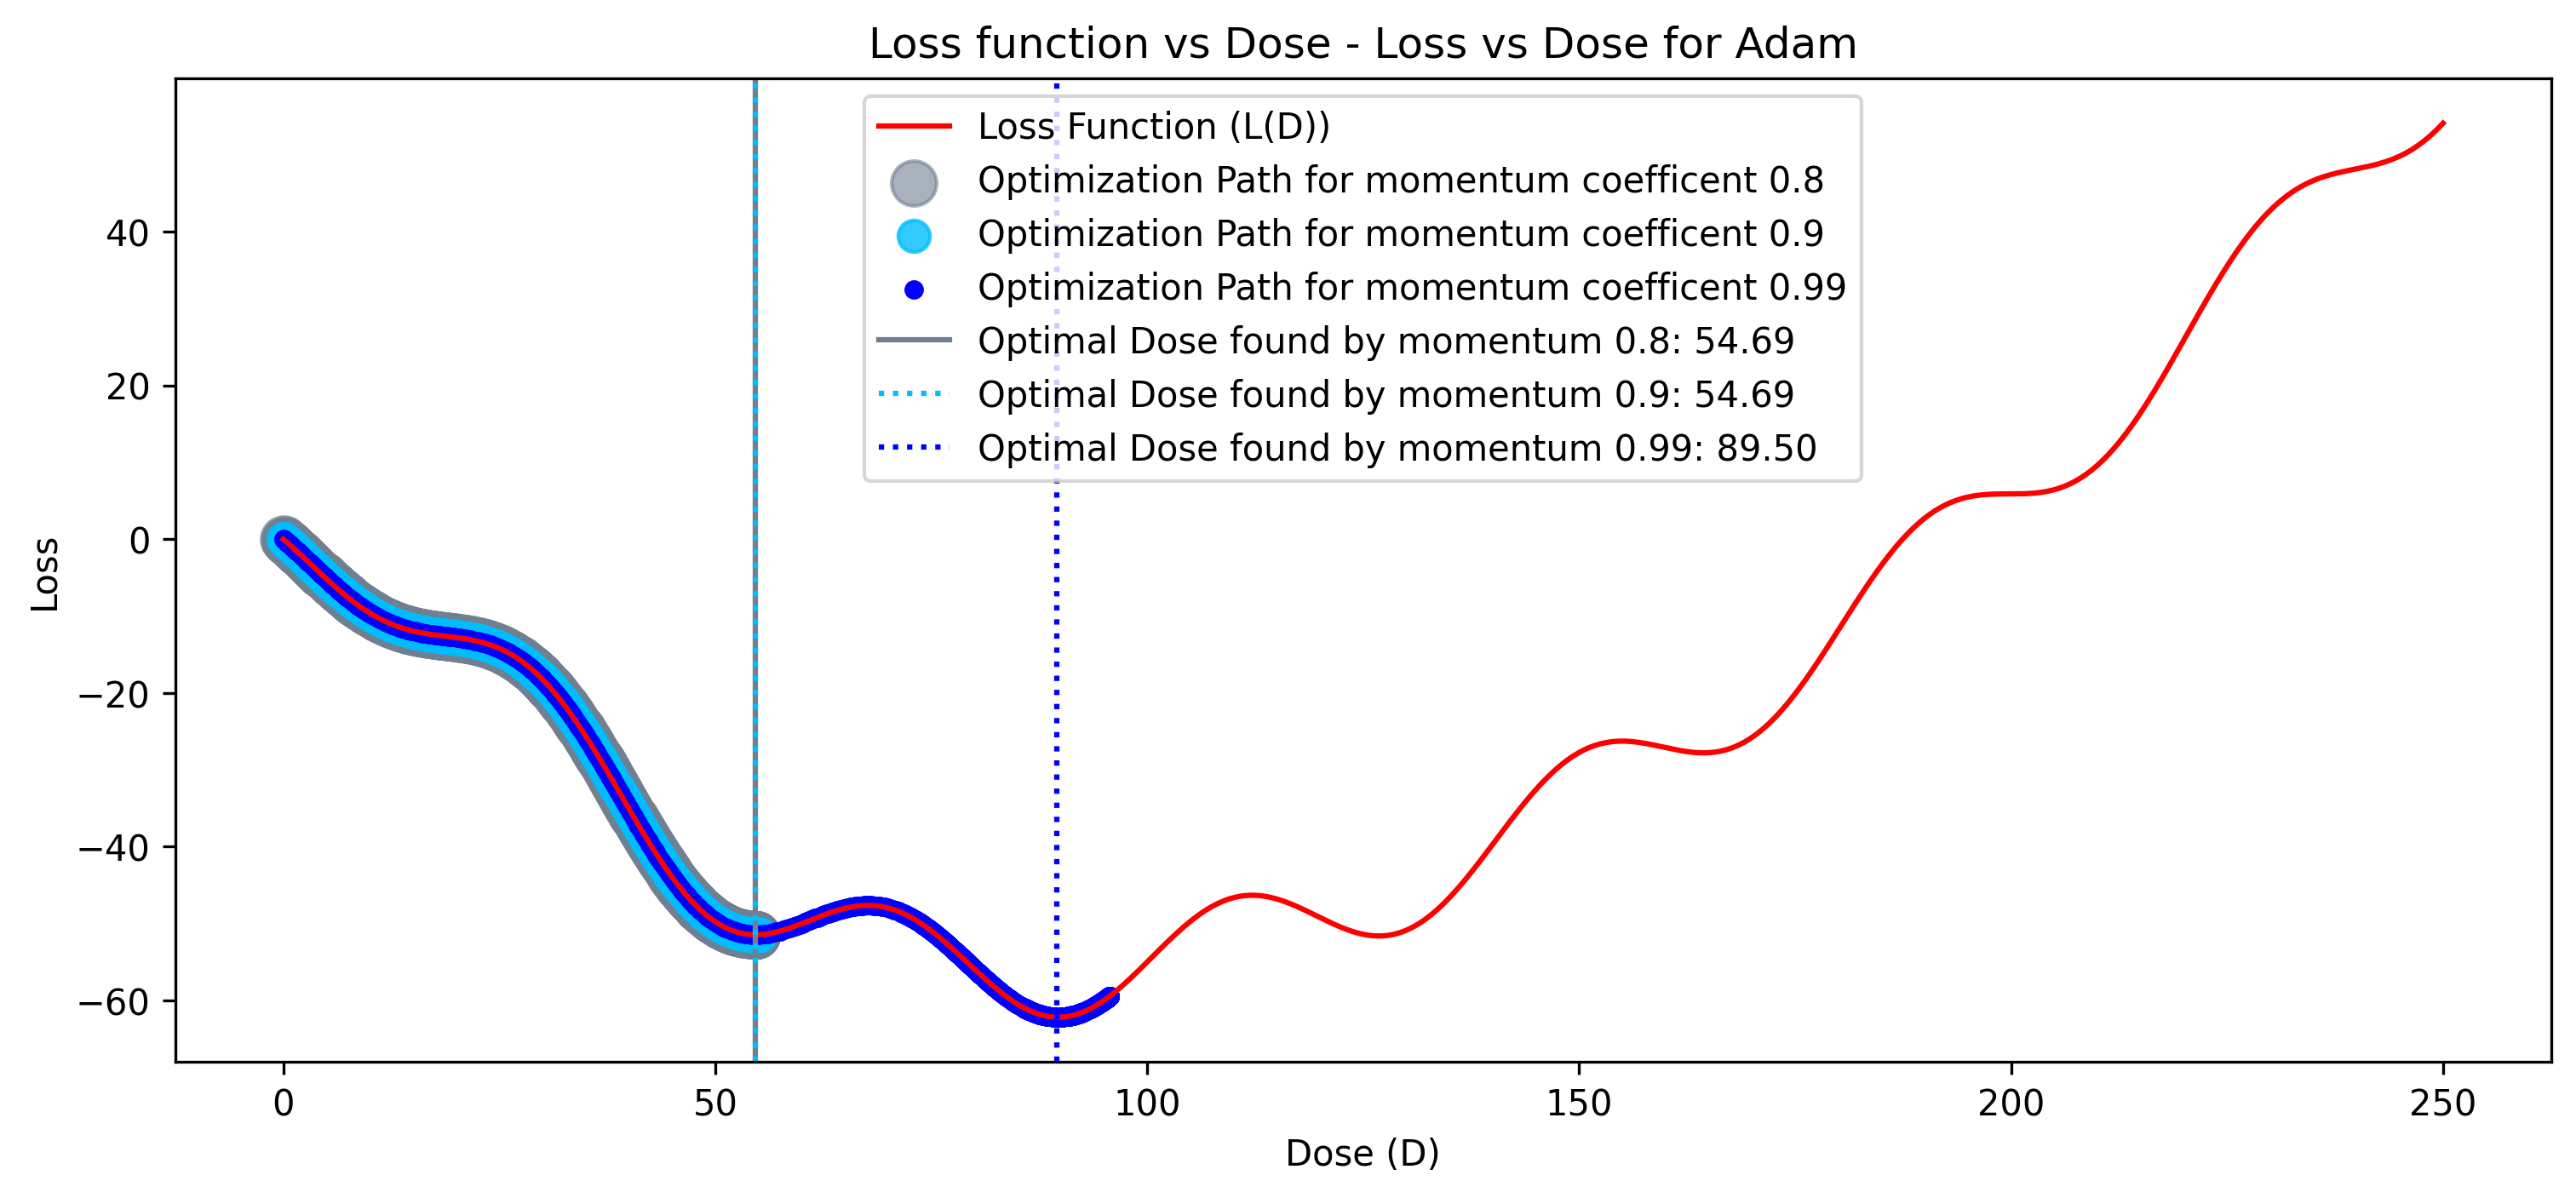

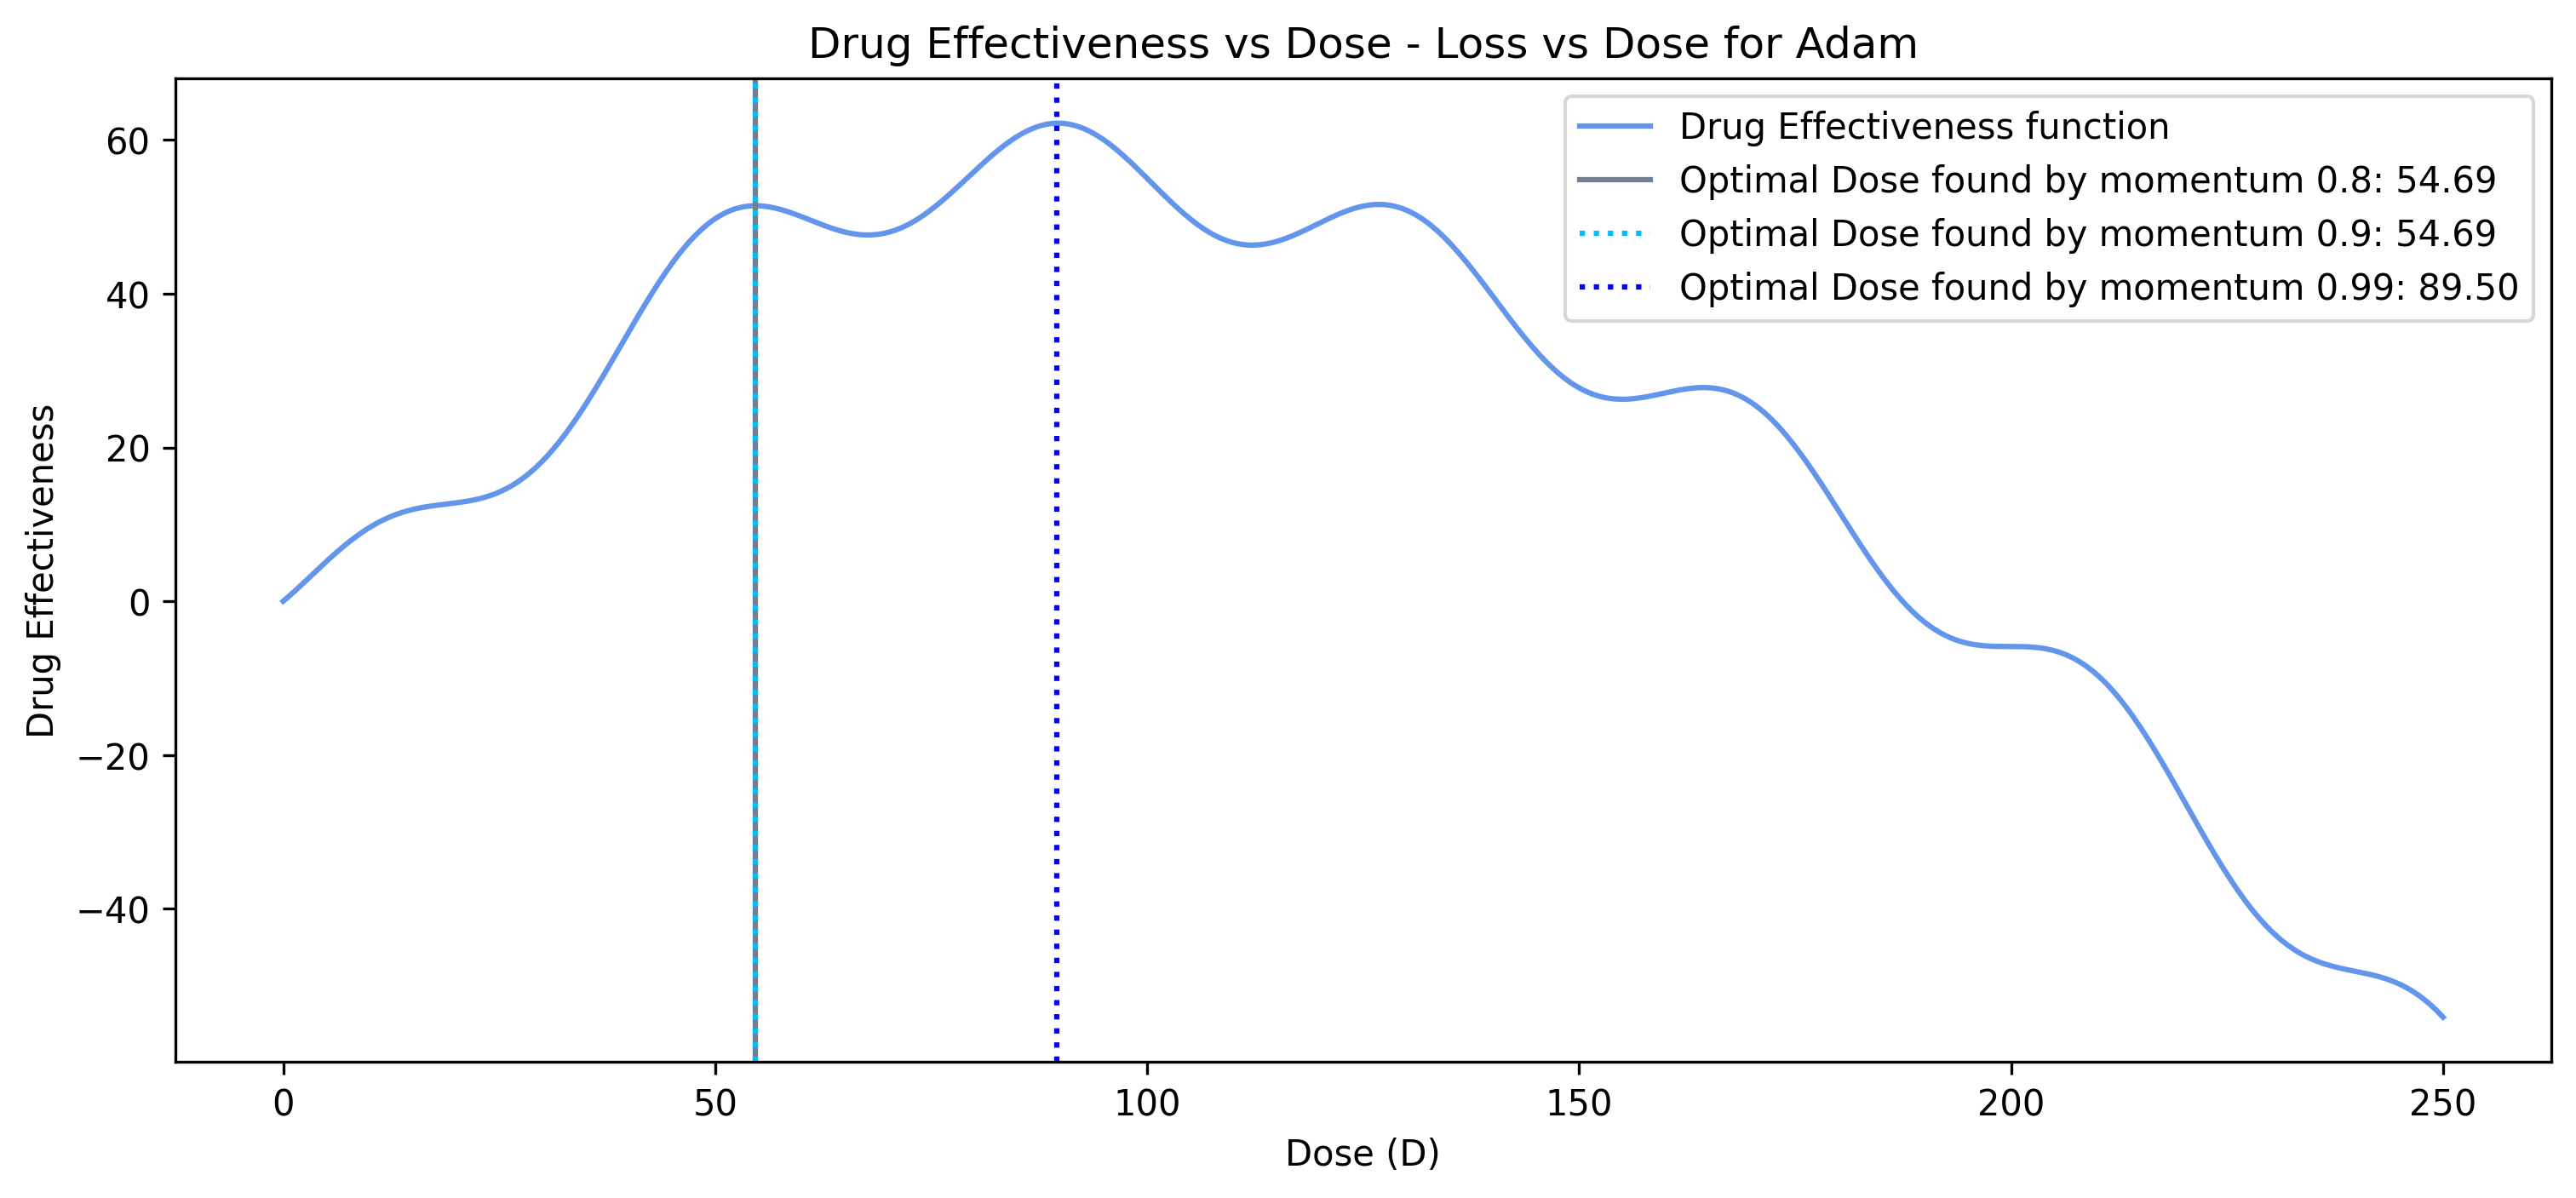

Maximum Effectiveness with Momentum : 62.17
Best Dose for maximum Effectiveness with Momentum : 89.50


In [12]:
''' 
Finally we will implement Gradient Descent with an Adam optimizer.

Adam combines the strengths of Momentum and RMSprop by using two moving averages: 
one for the gradient itself (momentum term) and another for the squared gradient (adaptive learning rate term).
These two components work together to adapt both the step size and the direction of updates dynamically.

We will again explore different momentum coefficients (0.8,0.9,0.99) 
to analyze their impact on the optimization path and convergence.
'''

epsilon = 1e-8 # small constant to avoid dividing by zero
learning_rate = 0.1
epochs = 100000
rms_prop_coefficient = 0.9
momentum_coefficients = [0.8, 0.9, 0.99]

losses_with_adam = []
d_history_adam = []
optimal_Ds_adam = []

for momentum_coefficient in momentum_coefficients:
    D = 0
    m = 0
    v = 0

    for epoch in range(epochs):
        d_history_adam.append(D)
        losses_with_adam.append(loss_function(D))

        gradient = loss_function_gradient(D)
        m = momentum_coefficient * m + (1 - momentum_coefficient) * gradient
        v = rms_prop_coefficient * v + (1 - rms_prop_coefficient) * gradient**2

        m_corrected = m / (1 - momentum_coefficient**(epoch + 1))
        v_corrected = v / (1 - rms_prop_coefficient**(epoch + 1))

        effective_learning_rate = learning_rate / (np.sqrt(v_corrected) + epsilon)
        D -= effective_learning_rate * m_corrected

    optimal_Ds_adam.append(D)

plot_results(all_Ds,all_Es,all_Ls,epochs,momentum_coefficients,d_history_adam,optimal_Ds_adam,None,'Loss vs Dose for Adam')

best_d = None
best_effectiveness_adam = 0

for d in optimal_Ds_adam:
    if effectiveness(d) > best_effectiveness_adam:
        best_effectiveness_momentum = effectiveness(d)
        best_d = d

print(f'Maximum Effectiveness with Momentum : {best_effectiveness_momentum:.2f}')
print(f'Best Dose for maximum Effectiveness with Momentum : {best_d:.2f}')



In [13]:
''' 
Observations: 

Well, I think we have an answer on which optimizer is the best for this task.

We see how the Gradient Descent with Adam, using a momentum coefficent of 0.99, found the optimal value for the dose,
getting the same Maximum Effectiveness with the Momentum Gradient Descent (62.17)

Important note. 

If Gradient Descnet with Momentum, and Gradient Descent with Adam, produce the exact same result, 
then why do we prefer one over the other?

Well, let's go to the equivalent plots, and take a look at the Drug dose (D) value optimization path on the loss function, 
for momentum coefficient = 0.99 :
 
- Gradient Descent with Momentum: It overshot the global minimum,
 moving far to the right along the loss function before eventually coming back left to converge at the optimal dose. 
 This occurred because momentum accumulates velocity, which can cause overshooting. 
 If the loss function hadn’t increased as it moved to the right, Momentum might have entirely missed the global minimum.

- Gradient Descent with Adam: Adam, on the other hand, was able to stop almost immediately after finding the global minimum. 
 This is because Adam incorporates RMSprop’s adaptive learning rate, 
 which slows down updates as the algorithm approaches the minimum, preventing overshooting.


This difference makes Adam more stable and reliable for complex landscapes, 
where overshooting could result in missing the optimal value.

Adam not only finds the solution but does so more efficiently and with fewer risks.

Best Dose suggested by Gradient Descent with Adam : 89.50
Maximum Effectiveness found by Gradient Descent with Adam : 62.17

'''

" \nObservations: \n\nWell, I think we have an answer on which optimizer is the best for this task.\n\nWe see how the Gradient Descent with Adam, using a momentum coefficent of 0.99, found the optimal value for the dose,\ngetting the same Maximum Effectiveness with the Momentum Gradient Descent (62.17)\n\nImportant note. \n\nIf Gradient Descnet with Momentum, and Gradient Descent with Adam, produce the exact same result, \nthen why do we prefer one over the other?\n\nWell, let's go to the equivalent plots, and take a look at the Drug dose (D) value optimization path on the loss function, \nfor momentum coefficient = 0.99 :\n \n- Gradient Descent with Momentum: It overshot the global minimum,\n moving far to the right along the loss function before eventually coming back left to converge at the optimal dose. \n This occurred because momentum accumulates velocity, which can cause overshooting. \n If the loss function hadn’t increased as it moved to the right, Momentum might have entirely